<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Cleaning-and-Feature-Engineering" data-toc-modified-id="Data-Cleaning-and-Feature-Engineering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Cleaning and Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Create-columns-from-text-feature" data-toc-modified-id="Create-columns-from-text-feature-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Create columns from text feature</a></span></li><li><span><a href="#Function-to-extract-#-and-@-words." data-toc-modified-id="Function-to-extract-#-and-@-words.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Function to extract # and @ words.</a></span></li><li><span><a href="#Create-features-for-#,-@,-cleaned-tweets,-date-fields,-and-sentiments" data-toc-modified-id="Create-features-for-#,-@,-cleaned-tweets,-date-fields,-and-sentiments-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Create features for #, @, cleaned tweets, date fields, and sentiments</a></span></li><li><span><a href="#Exploring-Location" data-toc-modified-id="Exploring-Location-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Exploring Location</a></span></li><li><span><a href="#Lemmatization-,-Tweet-Tokenizing,-Bigrams-and-Trigrams" data-toc-modified-id="Lemmatization-,-Tweet-Tokenizing,-Bigrams-and-Trigrams-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Lemmatization , Tweet Tokenizing, Bigrams and Trigrams</a></span></li></ul></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualization</a></span><ul class="toc-item"><li><span><a href="#Sentiment-distribution" data-toc-modified-id="Sentiment-distribution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sentiment distribution</a></span></li><li><span><a href="#Weekly-trend-of-sentiment" data-toc-modified-id="Weekly-trend-of-sentiment-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Weekly trend of sentiment</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Word-Cloud" data-toc-modified-id="Word-Cloud-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Word Cloud</a></span><ul class="toc-item"><li><span><a href="#Wordcloud-of-tweets" data-toc-modified-id="Wordcloud-of-tweets-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Wordcloud of tweets</a></span></li><li><span><a href="#Wordcloud-of-positive-sentiment-tweets" data-toc-modified-id="Wordcloud-of-positive-sentiment-tweets-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Wordcloud of positive sentiment tweets</a></span></li><li><span><a href="#Wordcloud-of-negative-sentiment-tweets" data-toc-modified-id="Wordcloud-of-negative-sentiment-tweets-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Wordcloud of negative sentiment tweets</a></span></li><li><span><a href="#Word-Cloud-of-@-mentions" data-toc-modified-id="Word-Cloud-of-@-mentions-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Word Cloud of @ mentions</a></span></li></ul></li></ul></li><li><span><a href="#Cases-from-UK-government" data-toc-modified-id="Cases-from-UK-government-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cases from UK government</a></span></li><li><span><a href="#EDA-Conclusion" data-toc-modified-id="EDA-Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA Conclusion</a></span><ul class="toc-item"><li><span><a href="#Limitations" data-toc-modified-id="Limitations-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Limitations</a></span></li><li><span><a href="#Risk" data-toc-modified-id="Risk-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Risk</a></span></li><li><span><a href="#If-I-had-more-time" data-toc-modified-id="If-I-had-more-time-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>If I had more time</a></span></li></ul></li><li><span><a href="#Vectorization" data-toc-modified-id="Vectorization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Vectorization</a></span><ul class="toc-item"><li><span><a href="#Tf-Idf-Vectorizer" data-toc-modified-id="Tf-Idf-Vectorizer-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Tf-Idf Vectorizer</a></span></li><li><span><a href="#Merge-word-vector-with-original-dataframe" data-toc-modified-id="Merge-word-vector-with-original-dataframe-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Merge word vector with original dataframe</a></span></li><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>One-Hot Encoding</a></span></li><li><span><a href="#Train-Test-Split-and-Standardization" data-toc-modified-id="Train-Test-Split-and-Standardization-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Train-Test Split and Standardization</a></span></li></ul></li></ul></div>

# Analyzing Coronavirus related tweets in England over one year

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import re
import nltk
import spacy

import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

#from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk import bigrams,ngrams
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
from wordcloud import WordCloud,STOPWORDS
from PIL import Image # for masking word cloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

import pprint
import joblib
import pickle



## Data Cleaning and Feature Engineering


Tweets were scraped during the 12-month period March 2020 to Feb 2021. Tweets were collected over a 200-km radius of three geographically spread cities - London, Leicester and Manchester. After removing nulls and duplicates, I had around 180,000 tweets. 
For better modelling, I created a sample of approximately 86,000 tweets. 

In [2]:
#read csv files into dataframe
df = pd.read_csv("data/covid_set1.csv")

In [3]:
# create a dataframe with only relevant columns
df = df[['date','text','location']]

In [4]:
df.shape

(86580, 3)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86580 entries, 0 to 86579
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      86580 non-null  object
 1   text      86580 non-null  object
 2   location  77656 non-null  object
dtypes: object(3)
memory usage: 2.0+ MB


### Create columns from text feature

In [5]:
# rename date field to time
df.rename(columns = {'date':'time'}, inplace=True)

# convert time field to datetime object
df['time'] = pd.to_datetime(df.time)

# set time field as index
df.set_index('time', inplace=True, drop=True)

# remove duplicate and null texts
df.drop_duplicates(subset='text',inplace=True)

# drop all null tweets
df = df[df['text'].notna()]

### Function to extract # and @ words. 
Clean text by removing symbols and links

In [6]:
# function to extract the word appearing after the symbol #
def get_hashtag(text):
    #if no # is found in the text, return null
    hashtag = re.findall(r"#(\w+)", text)
    if len(hashtag) == 0:
        hashtag = np.nan
    return hashtag

# function to extract the word appearing after the symbol @
def get_mention(text):
    mention = np.nan
    mention = re.findall(r"@(\w+)", text)
    if len(mention) == 0:
        mention = np.nan
    return mention

'''remove links and digits. 
Capitalization and emojis are retained for now as they contribute to the 
VADER sentiment analysis 
'''
def clean_text(x):
    # remove links
    clean = re.sub('http[s]?://\S+', '', x)
     
    # remove special characters and digits. Emojis are retained for now. 
    # Text will be cleaned later during the tokenization and lemmatizing process as well
    clean = re.sub("(\\d)+"," ",clean)
    return clean

### Create features for #, @, cleaned tweets, date fields, and sentiments

In [7]:
# call functions to extract # and @ words, and to remove links and symbols from text
df['hashtag'] = df['text'].apply(lambda x: get_hashtag(x))
df['mention'] = df['text'].apply(lambda x: get_mention(x))
df['text'] = df['text'].apply(lambda x: clean_text(x))

# get date, month, day of the week, and hour when tweet was posted
df['Date'] = df.index.date
df['Day'] = df.index.dayofweek
df['Month'] = df.index.month
df['Hour'] = df.index.hour

# get sentiment for tweet text using Vader SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df['Negative'] = df['text'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
df['Neutral'] = df['text'].apply(lambda x: analyzer.polarity_scores(x)['neu'])
df['Positive'] = df['text'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
df['Polarity'] = df['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['abs_pol'] = abs(df['Polarity']) 
df['Sentiment'] = df['Polarity'].apply(lambda x: 1 if x > 0 else -1 if x < 0 else 0 )
df['Length'] = df['text'].str.len()
pd.set_option("display.max_colwidth", None)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(df[['text','Polarity']].sort_values(by="Polarity"))

                                                                                                                                                                                                                                                                                                                          text  \
time                                                                                                                                                                                                                                                                                                                             
2020-11-10 12:38:28+00:00                                                                                                                                                                                                                     If it wasn’t for coronavirus.... I’d be going to Hawaii today 😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭   
2020-03-14 01:42:45+00:00         

### Exploring Location

In [90]:
df.location.nunique()

7087

In [8]:
# function to return London, Leicester, Manchester if it appears in location
def get_region(location):
    locations = ['London','Leicester','Manchester']
    try:
        for loc in locations:
            if loc.lower() in str(location).lower():
                location = loc
            else:
                location = re.sub(r'\W',' ', location)
        return location
    except:
        location = re.sub(r'\W',' ', str(location))
        return location

df['Region'] = df['location'].apply(get_region)
df.Region.value_counts(normalize=True).sort_values(ascending=False).head(10)

London                       0.434465
Manchester                   0.120986
nan                          0.103072
Leicester                    0.023008
United Kingdom               0.017648
England  United Kingdom      0.012601
Americas   United Kingdom    0.012047
UK                           0.009044
North West  England          0.009021
Salford  England             0.005452
Name: Region, dtype: float64

An analysis of tweets shows that most tweets are posted from London-based user profiles. According to Twitter's documentation, location refers to the home location provided by user in their public profile and not the location of the user at the time they posted the tweet. The location feature is highly unbalanced in this tweet scrape. 

In [92]:
df.Region.nunique()

4619

### Lemmatization , Tweet Tokenizing, Bigrams and Trigrams
In general, lemmatization offers better precision than stemming, but at the expense of recall. Stemming and lemmatization are effective techniques to expand recall, with lemmatization giving up some of that recall to increase precision.
I use the nltp Tweet Tokenizer. I use the resulting tokens to obtain corresponding lemma words.
I create Bigrams and Trigrams on the original tweets which are in the column 'text'.


In [9]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sharadakumaran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sharadakumaran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
def tweet_tokenizer(tweet):
    
    stop_words = stopwords.words('english')

    tweet = re.sub('http[s]?://\S+', '', tweet)

    
    # remove special characters, foreign languages and digits. Emojis are retained for now. 
    tweet = re.sub('[^a-zA-Z]',' ',tweet)


   # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\d|\@\w+|\#','', tweet)
    
    # Use nltk TweetTokenizer to tokenize tweet text
    ttknzr = TweetTokenizer(
        preserve_case=False, reduce_len=True,strip_handles=True).tokenize(tweet)
    filtered_words = [w for w in ttknzr if not w in stop_words]
    
    return " ".join(filtered_words)

# function to convert text to n-grams
def get_ngrams(text,n=2):
    n_grams = ngrams(word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]

def get_word_pos(word):
    
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def get_lemma(sentence):
    lemma = [lemmatizer.lemmatize(w, get_word_pos(w)) for w in nltk.word_tokenize(sentence)]
    return " ".join(lemma)


In [11]:
# Tokenize tweet text
df['tweet_token'] = df['text'].apply(tweet_tokenizer)

# Lemmatize the tweet token
lemmatizer = WordNetLemmatizer()
df['lemma'] = df['tweet_token'].apply(get_lemma)

# create bigrams and trigrams from tweet text
df['bigram'] = df['text'].apply(lambda x: get_ngrams(x,2))
df['trigram'] = df['text'].apply(lambda x: get_ngrams(x,3))

In [12]:
df.head()

text  \
time                                                                                                                                                                                                                                                                                             
2021-02-05 09:43:20+00:00                                                                                                                                                                                                                     When the pandemic ends I want to go speed dating   
2021-02-15 08:37:19+00:00              Still find it incredulous how a man in Neil Ferguson, whose historic modelling has been proven to have had such inaccurate results, is STILL the one majorly defining government policy on Covid. Why? When his record is so woefully inaccurate. 🤷‍♂️    
2020-04-20 11:14:19+00:00                                                                                                                                                                "Boris Johnson skipped COVID-  meetings and ignored scientists' warnings, The Sunday Times reports"     
2021-01-15 18:22:22+00:00  @clarky  Oh Sally 😔 Covid is affecting so much other treatment for so many people and will continue to unless people just suck it up &amp; at least try to stop the spread of the virus. Sending you all the love in the world. Glad you've had the first dose. Hxx   
2020-03-26 13:12:57+00:00                                                                                                                After #coronavirus is over.... definitely #coronababy we escalate the population of the world... in fact d wahala wey #coronavirus go bring... 😂😂😂😂😂    

                                               location  \
time                                                      
2021-02-05 09:43:20+00:00               London, England   
2021-02-15 08:37:19+00:00  Kingston upon Thames, London   
2020-04-20 11:14:19+00:00               London, England   
2021-01-15 18:22:22+00:00                    Manchester   
2020-03-26 13:12:57+00:00            burna boy house 👑🦍   

                                                          hashtag  \
time                                                                
2021-02-05 09:43:20+00:00                                     NaN   
2021-02-15 08:37:19+00:00                                     NaN   
2020-04-20 11:14:19+00:00                                     NaN   
2021-01-15 18:22:22+00:00                                     NaN   
2020-03-26 13:12:57+00:00  [coronavirus, coronababy, coronavirus]   

                               mention        Date  Day  Month  Hour  \
time                                                                   
2021-02-05 09:43:20+00:00          NaN  2021-02-05    4      2     9   
2021-02-15 08:37:19+00:00          NaN  2021-02-15    0      2     8   
2020-04-20 11:14:19+00:00          NaN  2020-04-20    0      4    11   
2021-01-15 18:22:22+00:00  [clarky382]  2021-01-15    4      1    18   
2020-03-26 13:12:57+00:00          NaN  2020-03-26    3      3    13   

                           Negative  Neutral  Positive  Polarity  abs_pol  \
time                                                                        
2021-02-05 09:43:20+00:00     0.000    0.874     0.126    0.0772   0.0772   
2021-02-15 08:37:19+00:00     0.075    0.925     0.000   -0.5410   0.5410   
2020-04-20 11:14:19+00:00     0.290    0.710     0.000   -0.5423   0.5423   
2021-01-15 18:22:22+00:00     0.084    0.776     0.140    0.5267   0.5267   
2020-03-26 13:12:57+00:00     0.144    0.529     0.328    0.9451   0.9451   

                           Sentiment  Length              Region  \
time                                                               
2021-02-05 09:43:20+00:00          1      48              London   
2021-02-15 08:37:19+00:00         -1     247              London   
2020-04-20 11:14:19+00:00         -1

In [13]:
df[['text','tweet_token','lemma','bigram','trigram']].head(3)

text  \
time                                                                                                                                                                                                                                                                                 
2021-02-05 09:43:20+00:00                                                                                                                                                                                                         When the pandemic ends I want to go speed dating   
2021-02-15 08:37:19+00:00  Still find it incredulous how a man in Neil Ferguson, whose historic modelling has been proven to have had such inaccurate results, is STILL the one majorly defining government policy on Covid. Why? When his record is so woefully inaccurate. 🤷‍♂️    
2020-04-20 11:14:19+00:00                                                                                                                                                    "Boris Johnson skipped COVID-  meetings and ignored scientists' warnings, The Sunday Times reports"     

                                                                                                                                                                                         tweet_token  \
time                                                                                                                                                                                                   
2021-02-05 09:43:20+00:00                                                                                                                                         pandemic ends want go speed dating   
2021-02-15 08:37:19+00:00  still find incredulous man neil ferguson whose historic modelling proven inaccurate results still one majorly defining government policy covid record woefully inaccurate   
2020-04-20 11:14:19+00:00                                                                                      boris johnson skipped covid meetings ignored scientists warnings sunday times reports   

                                                                                                                                                                                        lemma  \
time                                                                                                                                                                                            
2021-02-05 09:43:20+00:00                                                                                                                                     pandemic end want go speed date   
2021-02-15 08:37:19+00:00  still find incredulous man neil ferguson whose historic model proven inaccurate result still one majorly define government policy covid record woefully inaccurate   
2020-04-20 11:14:19+00:00                                                                                        boris johnson skip covid meeting ignore scientist warning sunday time report   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               bigram  \
time                                                                                                                                                                                                                                                                                                                                                   

## Visualization

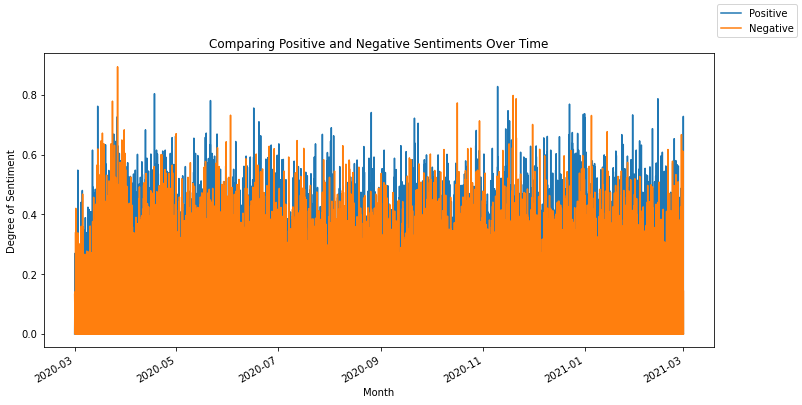

In [28]:
fig,ax = plt.subplots(figsize = (12,6))


df['Positive'].plot(ax=ax)
df['Negative'].plot(ax=ax)
ax.set_ylabel('Degree of Sentiment')
ax.set_xlabel('Month')
ax.set_title("Comparing Positive and Negative Sentiments Over Time")

fig.legend(["Positive","Negative"])
plt.show()

In [29]:
df['Sentiment'].value_counts(normalize=True)

 1    0.521067
-1    0.331555
 0    0.147378
Name: Sentiment, dtype: float64

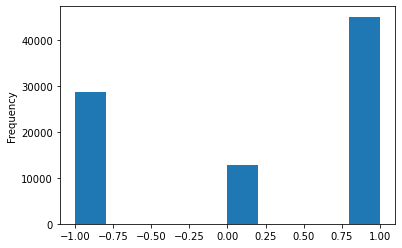

In [30]:
df['Sentiment'].plot.hist(bins=10);

/Users/sharadakumaran/opt/anaconda3/envs/spacy/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


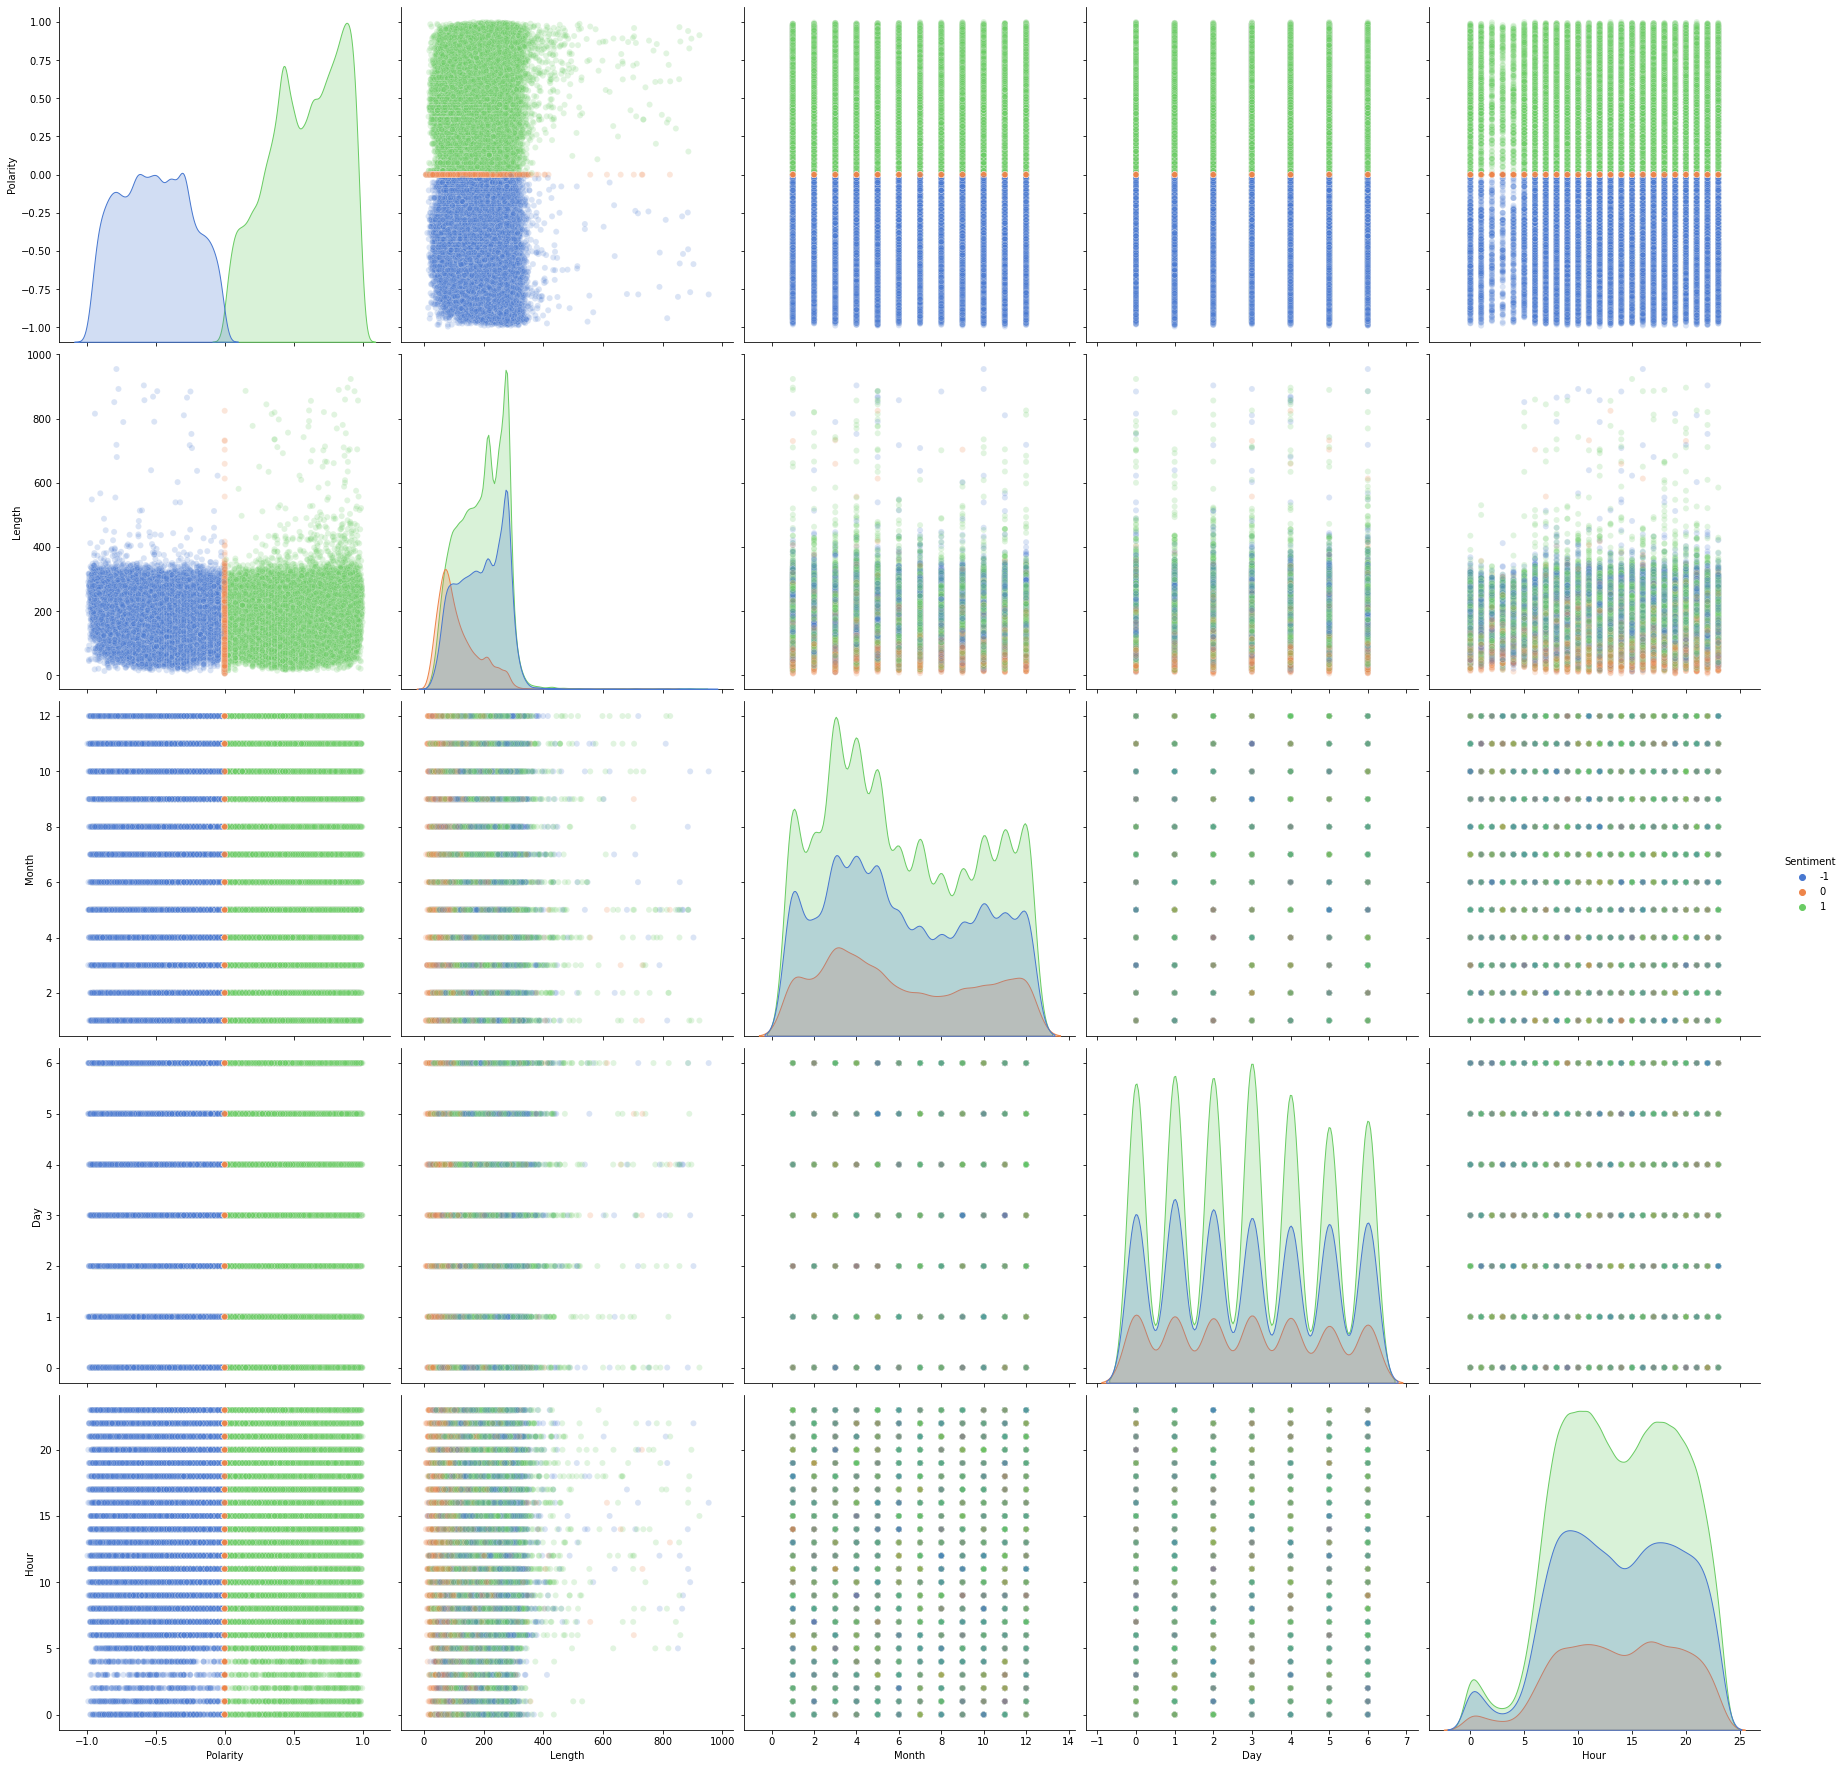

In [31]:
sns.pairplot(df, vars=['Polarity','Length','Month','Day','Hour'],
             hue='Sentiment',plot_kws={'alpha': 0.2}, height=5,palette='muted')
plt.show()

###  Sentiment distribution
Approximately half the tweets have a positive sentiment. About a third of the tweets have a negative sentiment. The rest are neutral.

In the graph above, we see that tweet characteristics such as polarity, and length do not change with the month, day or hour of tweeting.

Positive and Negative sentiment tweets are posted evenly throughout the day and on each day of the week.

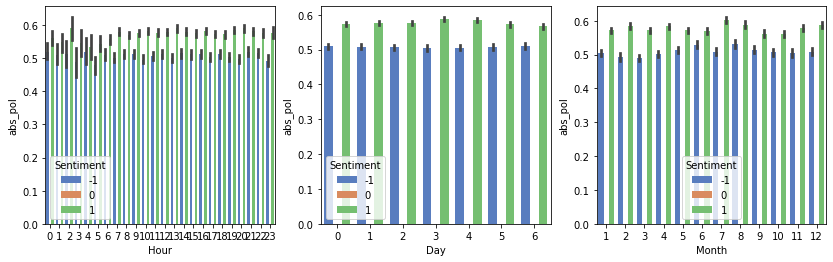

In [32]:
fig,ax = plt.subplots(ncols=3,figsize = (14,4))
sns.barplot(x="Hour",y="abs_pol",hue="Sentiment",data=df,palette='muted',ax=ax[0]);
sns.barplot(x="Day",y="abs_pol",hue="Sentiment",data=df,palette='muted',ax=ax[1]);
sns.barplot(x="Month",y="abs_pol",hue="Sentiment",data=df,palette='muted',ax=ax[2]);

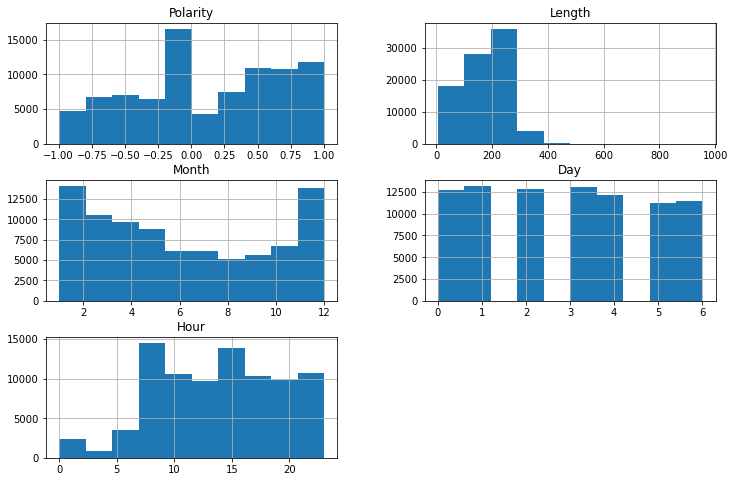

In [33]:
df[['Polarity','Length','Month','Day','Hour']].hist(figsize = (12,8))
plt.show()

Most tweets show a slightly negative or zero polarity. There are more positive than negative polarity tweets.
Over the 12-month period of this analysis, there were more tweets in December and January. 
Tweets were evenly distributed over each day of the week.
More tweets were posted during the day, between 10:00 and midnight.

### Weekly trend of sentiment

In [34]:
weekly = df.resample('W').mean()
weekly.head(3)

Day  Month       Hour  Negative   Neutral  \
time                                                                        
2020-03-01 00:00:00+00:00  6.000000    3.0  13.533333  0.107400  0.805400   
2020-03-08 00:00:00+00:00  3.029536    3.0  14.029536  0.080439  0.802278   
2020-03-15 00:00:00+00:00  4.009780    3.0  14.168704  0.077142  0.815774   

                           Positive  Polarity   abs_pol  Sentiment      Length  
time                                                                            
2020-03-01 00:00:00+00:00  0.087200 -0.044380  0.527500  -0.133333  184.666667  
2020-03-08 00:00:00+00:00  0.117308  0.133470  0.486414   0.206751  185.227848  
2020-03-15 00:00:00+00:00  0.107090  0.106042  0.416166   0.163814  165.310513

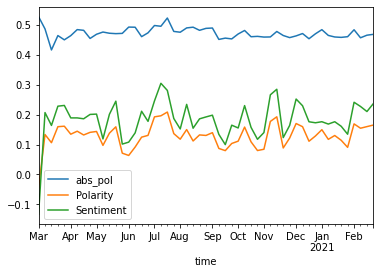

In [35]:
weekly[['abs_pol','Polarity','Sentiment']].plot();

This is a plot of sentiments (positive or negative) and polarity (measure of positive and negative sentiment) averaged weekly. While the sentiments fluctuate, tweets saw a peak in July and November. Tweets were most negative in the last week of May.

### Correlation

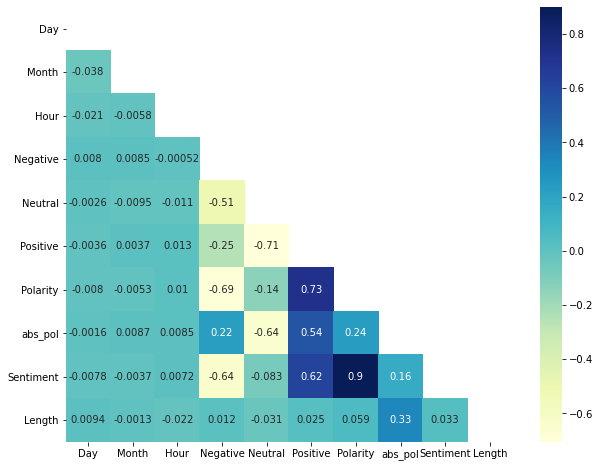

In [56]:
fig, ax = plt.subplots(figsize=(10,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, mask=mask,fmt='.2g',cmap="YlGnBu",ax=ax)
plt.show()


There seems to be almost no correlation between the sentiment of a tweet and the time of posting, nor the day of the week it was posted in. 

The objectivity of a tweet (as measured by the column "Polarity") is negatively correlated with the absolute-polarity (column "abs_pol) of the tweet.This indicates that the higher the polarity measure is, the less objective the tweet is. This is consistent with what these features indicate.
While the correlation heat map shows a high correlation between polarity and sentiment, this is expected, as the column "Sentiment" is derived from the column "Polarity".

### Word Cloud
A word cloud of the 1000 most frequently used words in tweets. This excludes the search criteria keywords of: Coronovirus, Covid, pandemic, health and vaccnine. At least one of these words will occur in each tweet, therefore the word cloud will be over-represented by these. 
I've created a word cloud for four different pre-processing strategies - 
a. NLP processing b. Lemmatization c. NLTK TweetTokenizer 

In [14]:
from PIL import Image

In [15]:
search_words = ('coronavirus','covid','pandemic','health','vaccine')
stopwords = STOPWORDS.union(search_words)

def wc(data,stopwords,bgcolor,title):
    mask = np.array(Image.open("Images/twitter_mask.png"))
    fig = plt.figure(figsize = (100,100))
    wc = WordCloud(stopwords = stopwords, mask=mask,background_color = bgcolor, 
                   width=mask.shape[1],height=mask.shape[0],
                   max_words = 1000,  max_font_size = 50)
    
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

#### Wordcloud of tweets

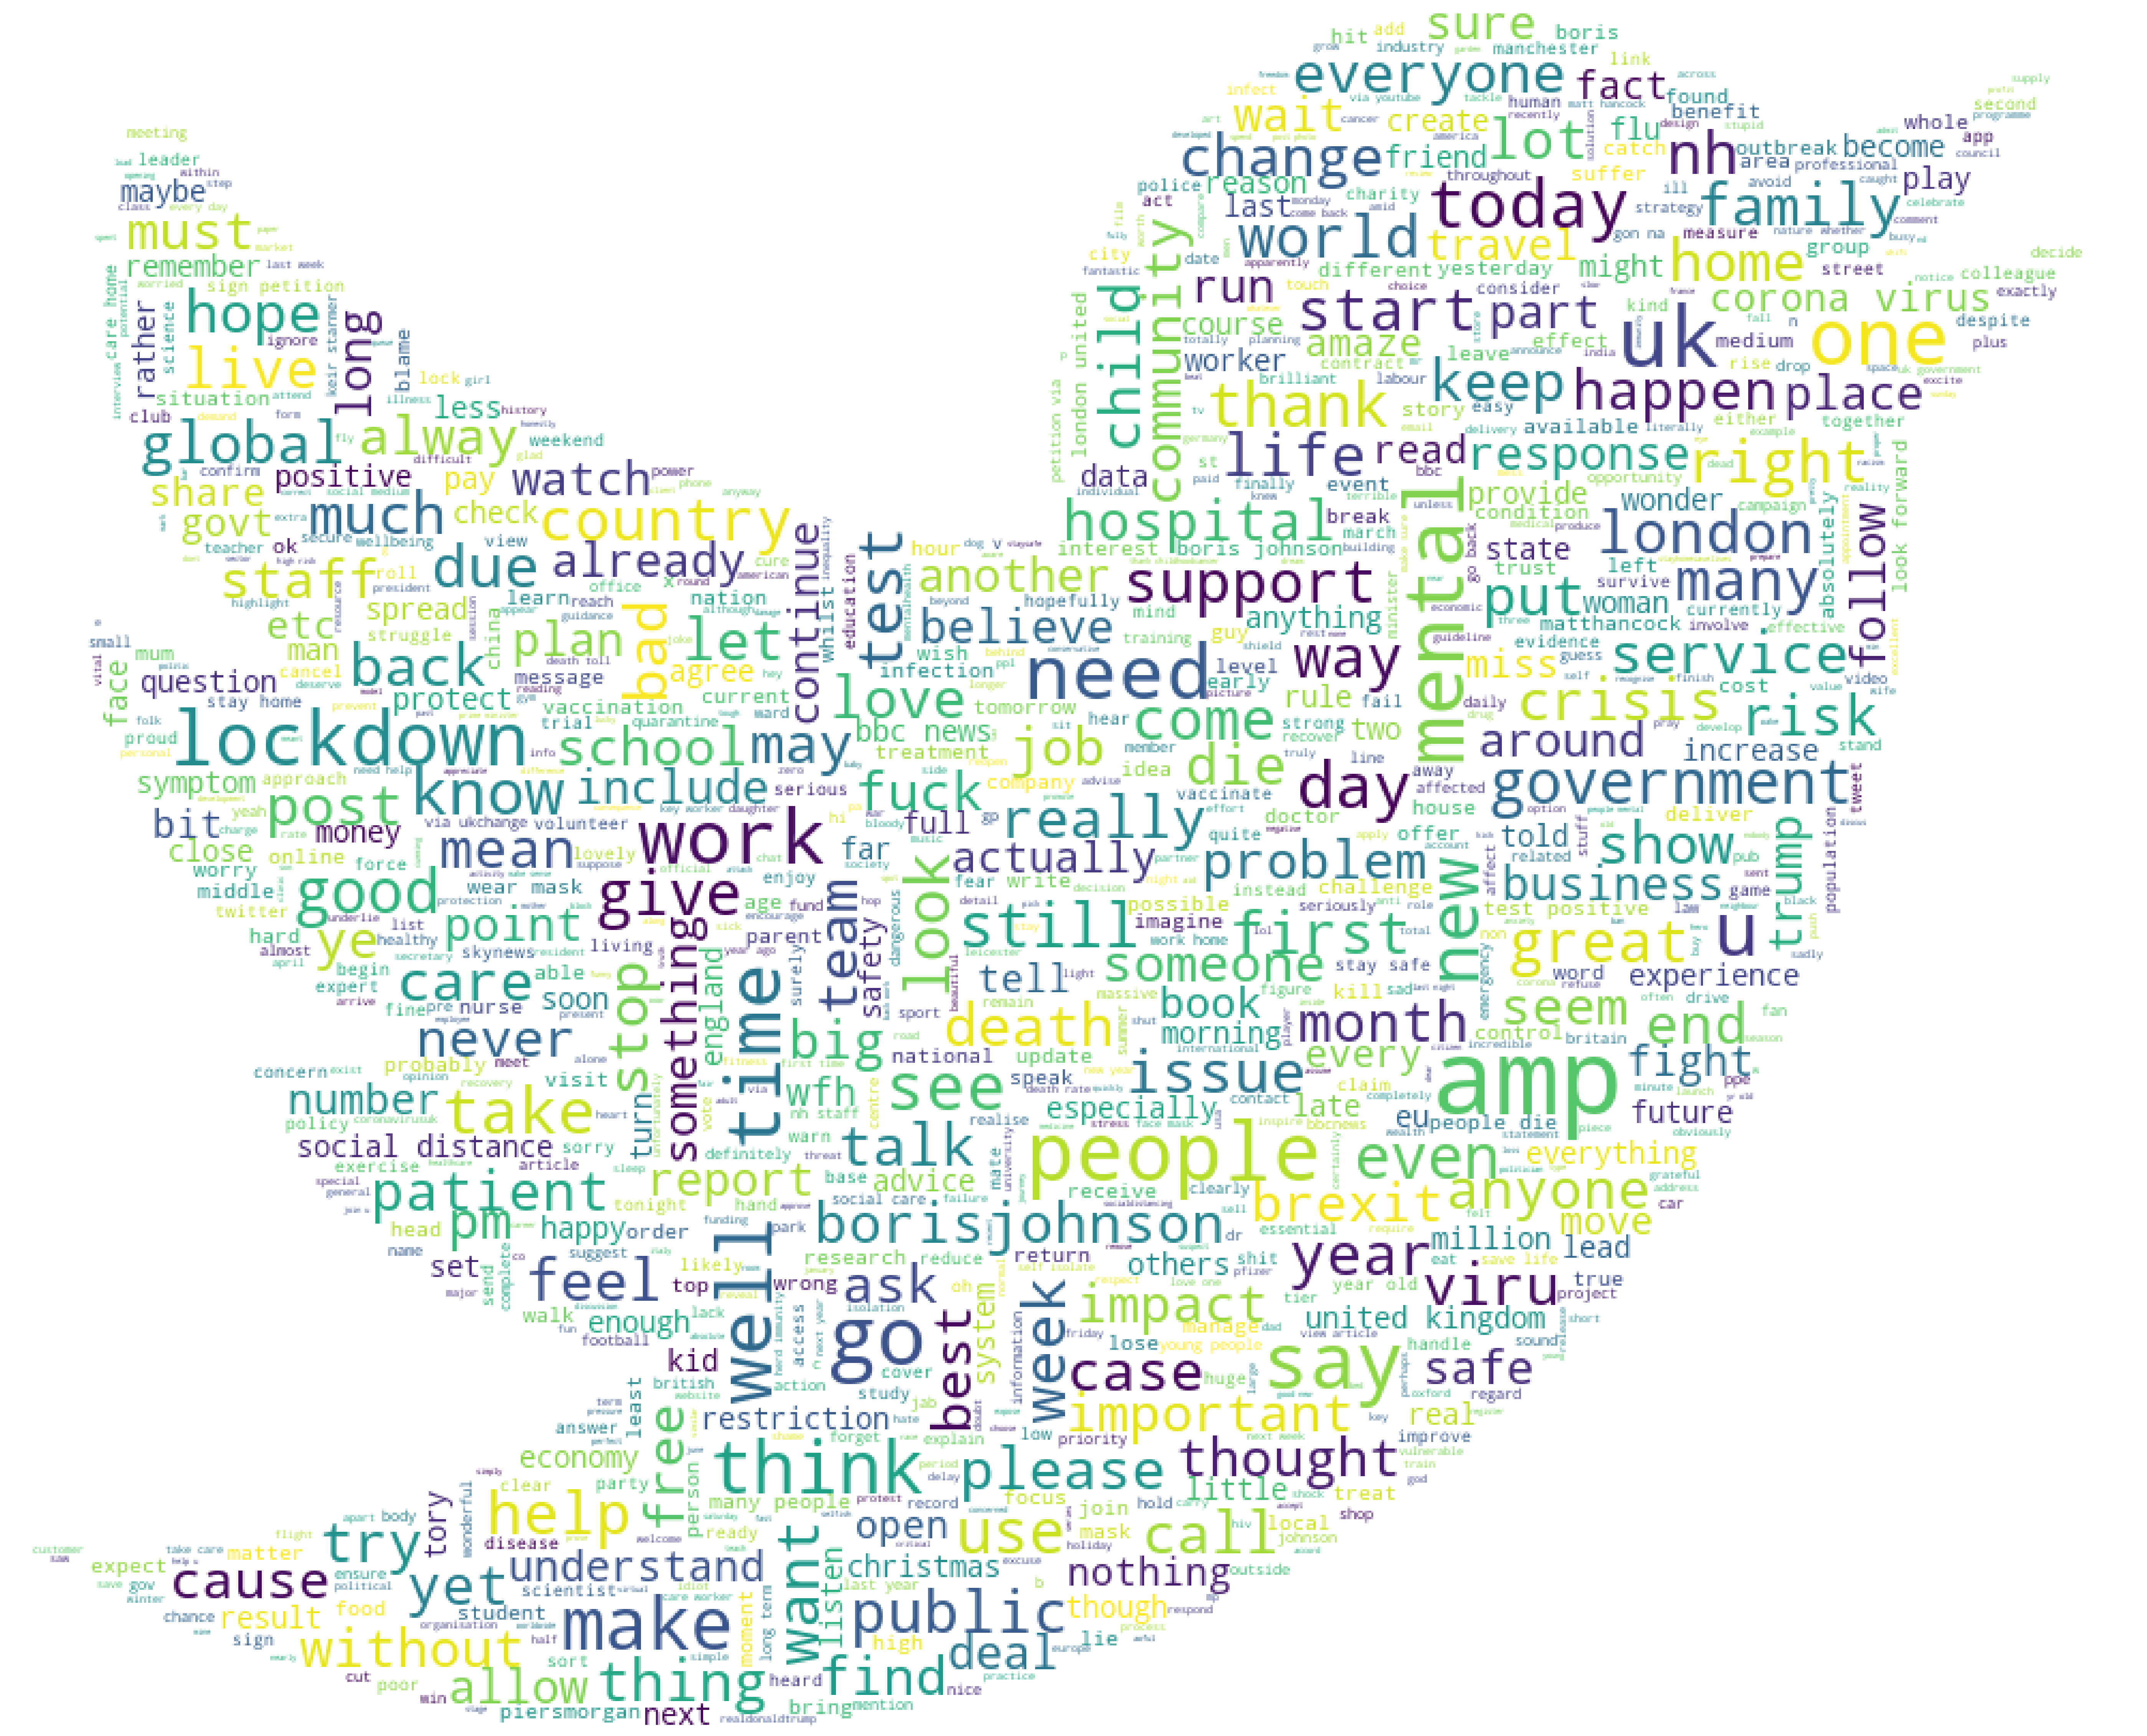

In [16]:
clean_text1 = [word for word in df['lemma']]
wc(clean_text1,stopwords,'white','Common Words' )

#### Wordcloud of positive sentiment tweets

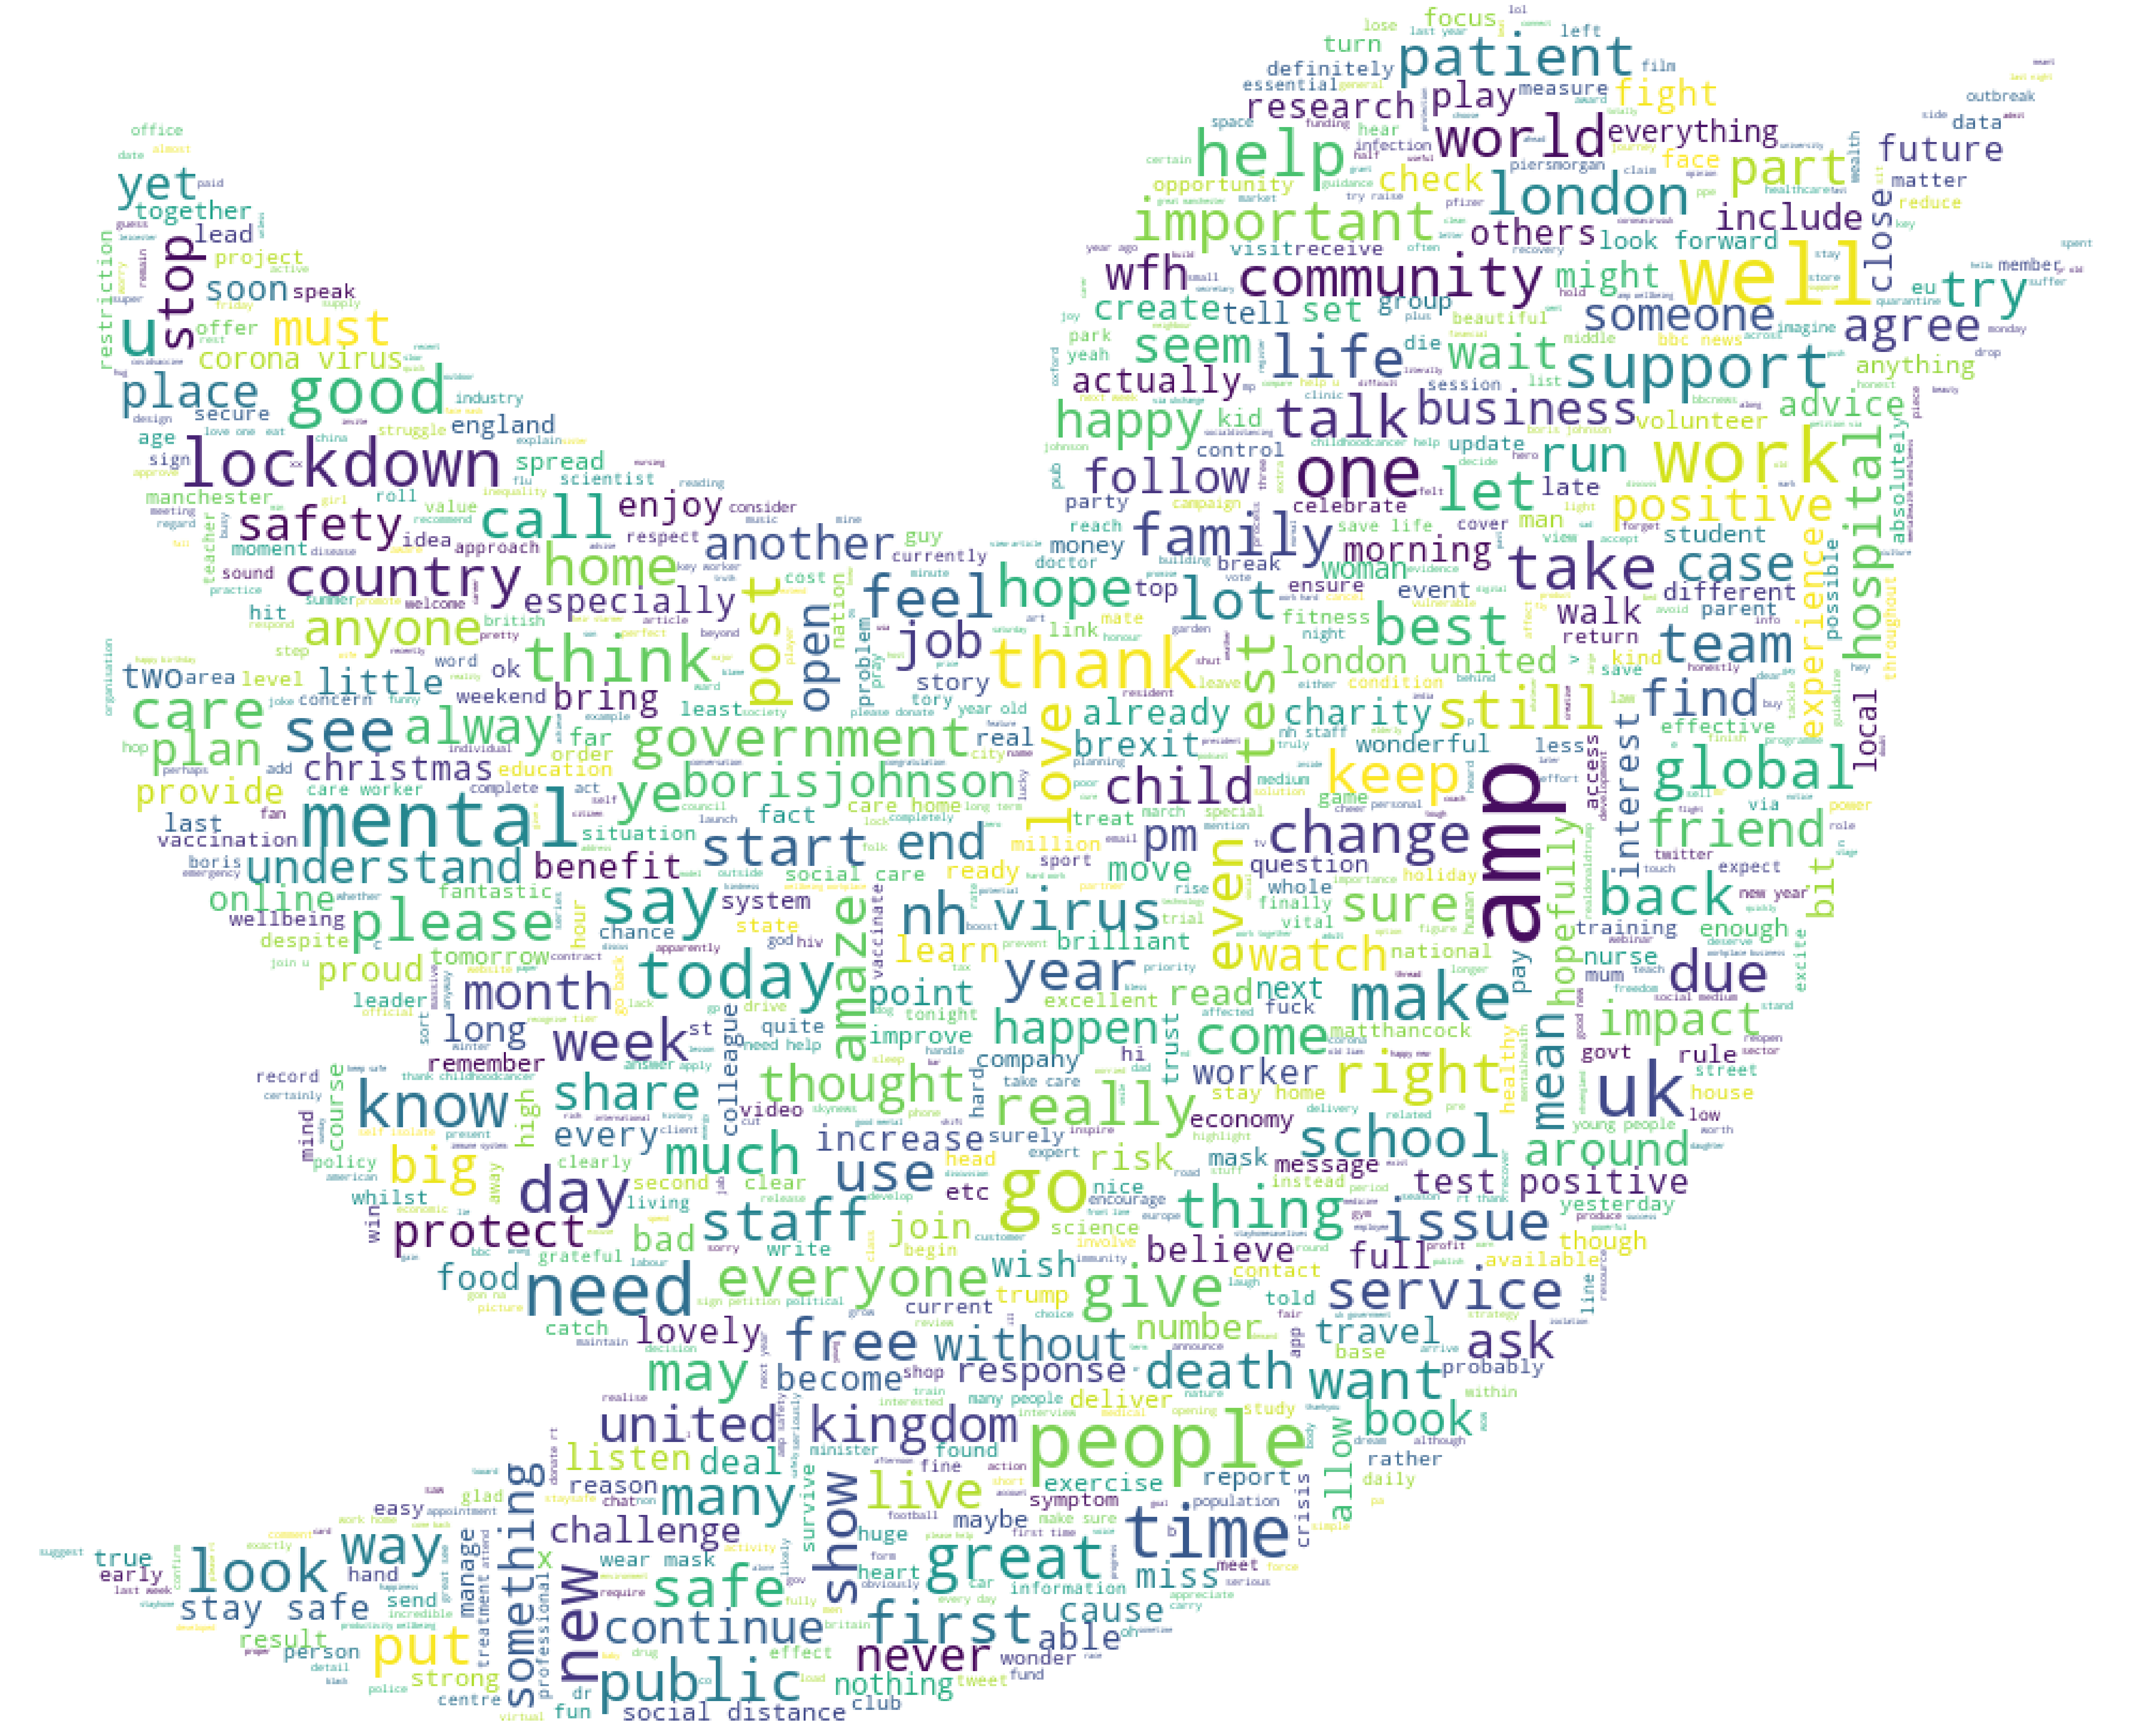

In [37]:
search_words = ('coronavirus','covid','pandemic','health','vaccine')
stopwords = STOPWORDS.union(search_words)
clean_text1 = [word for word in df['lemma'][df['Sentiment'] == 1]]
wc(clean_text1,stopwords,'white','Common Words' )

#### Wordcloud of negative sentiment tweets

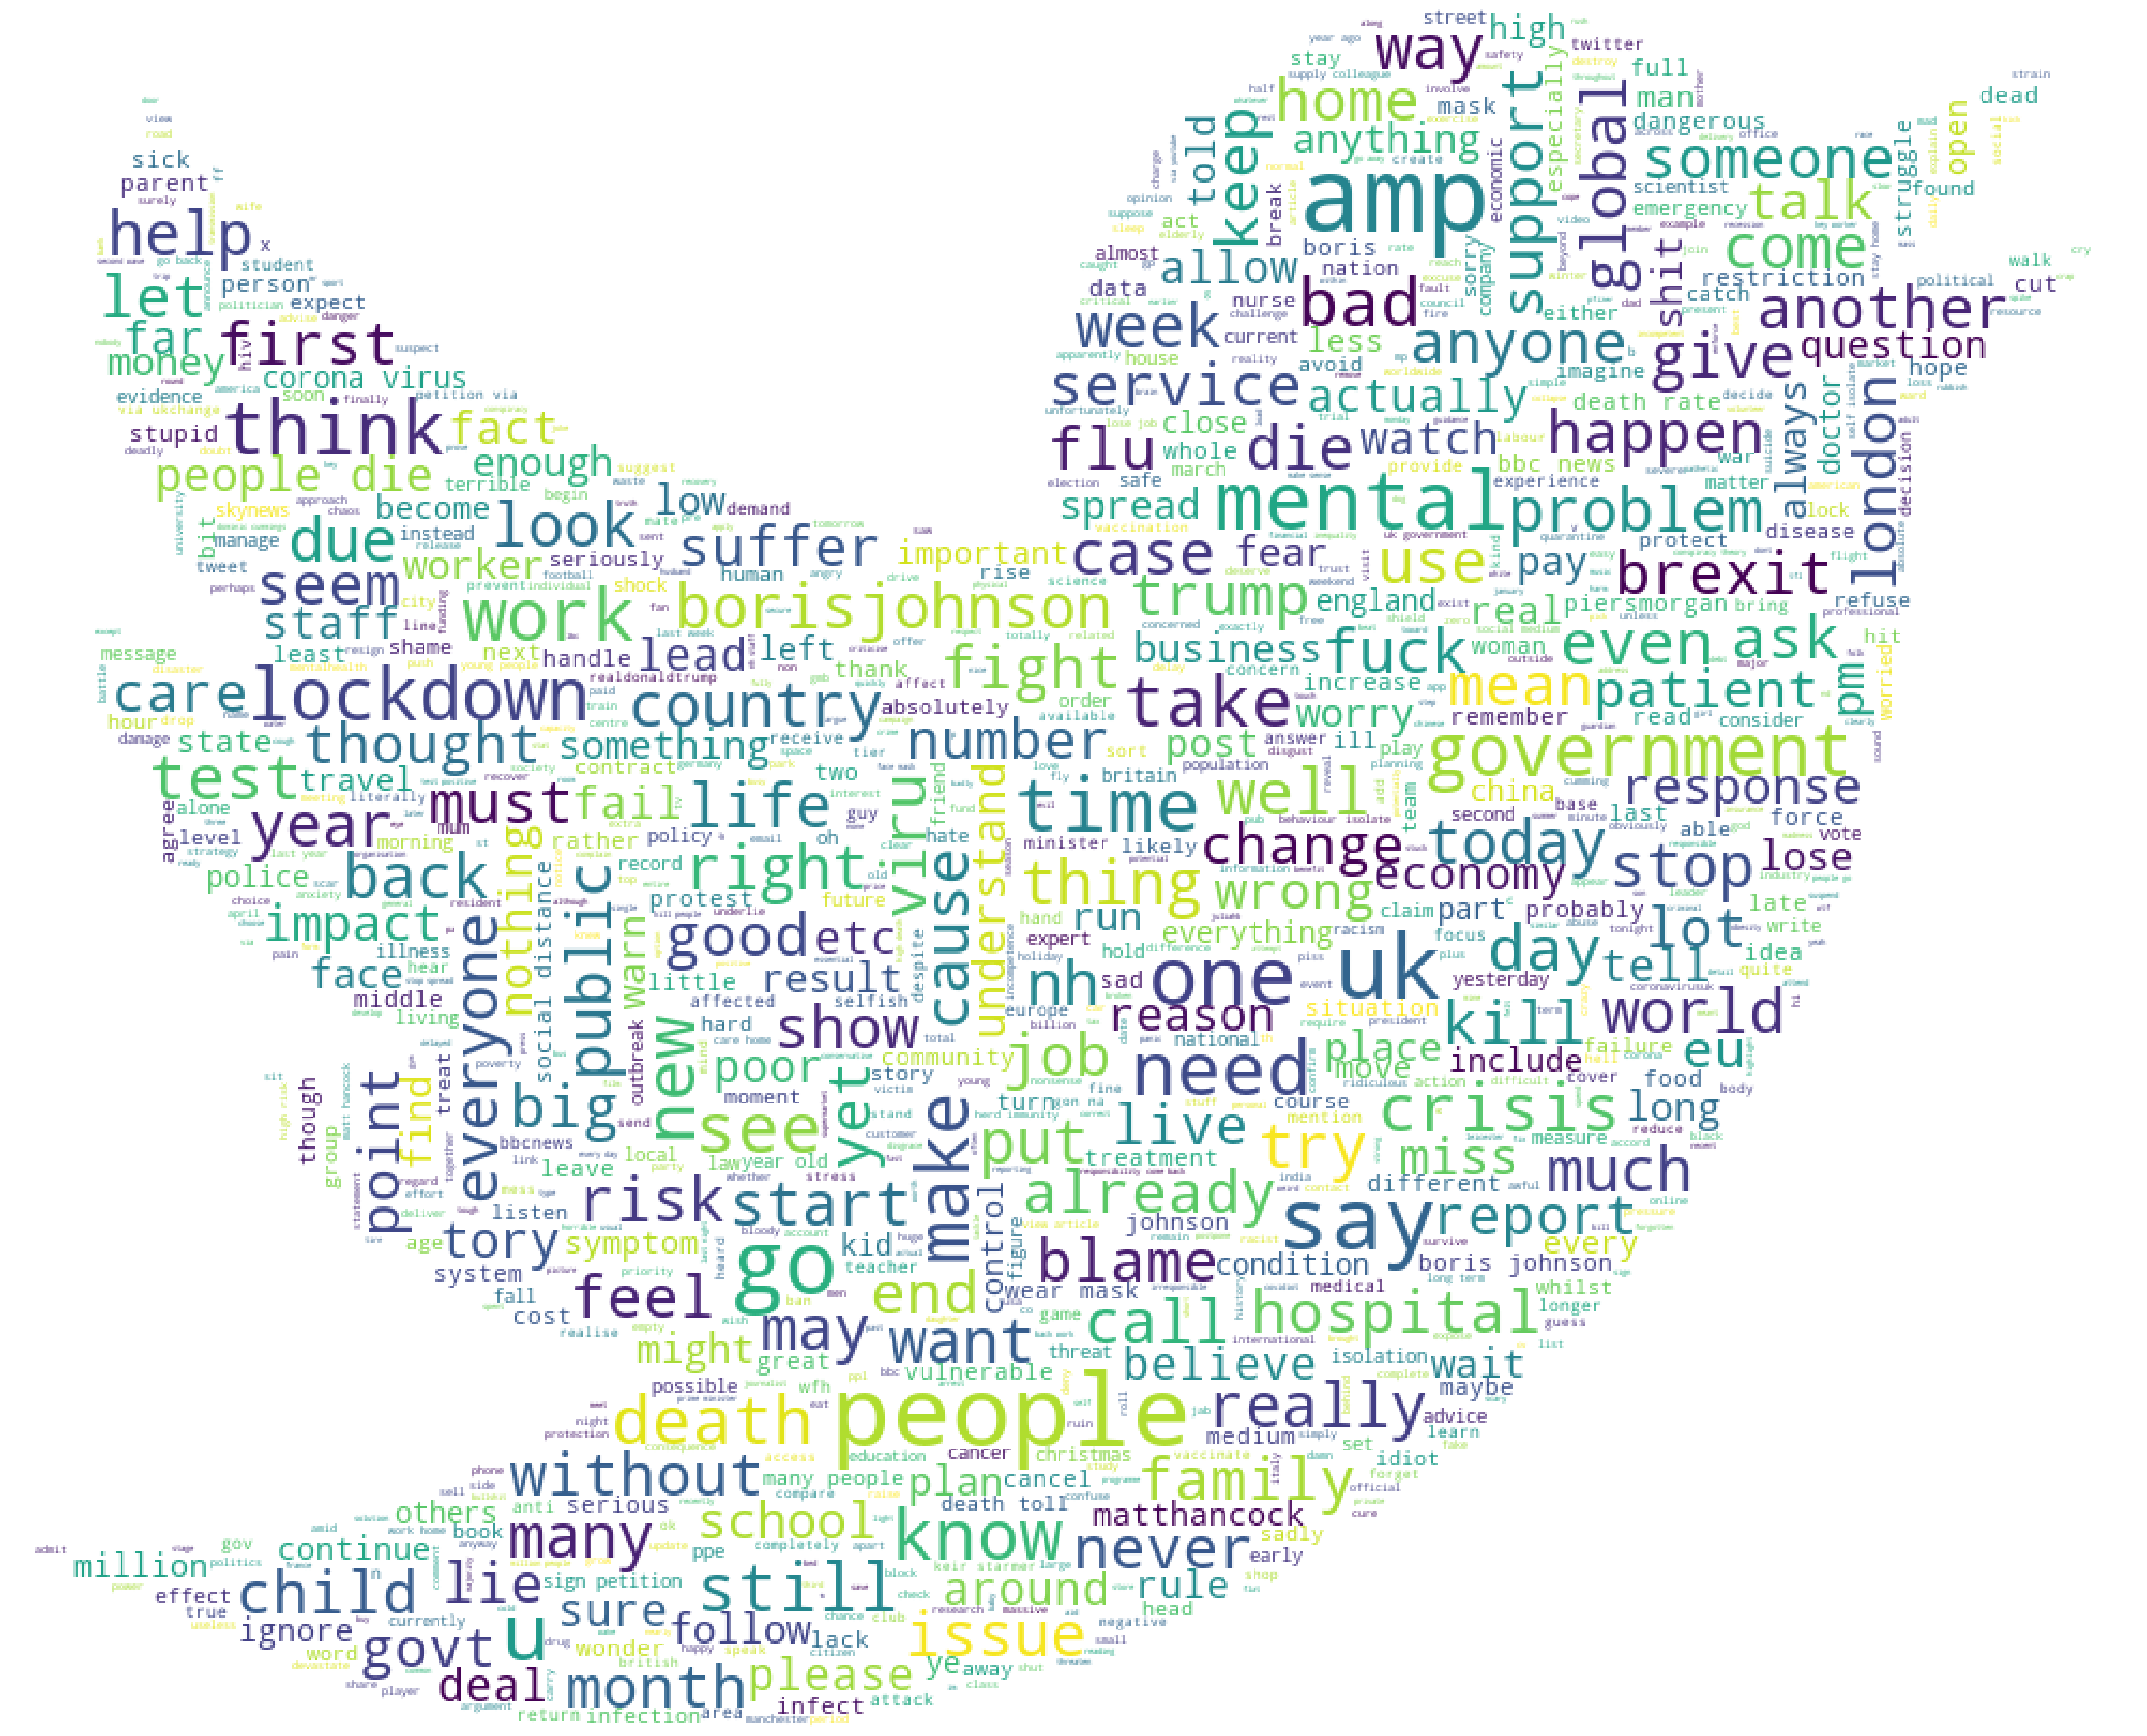

In [38]:
search_words = ('coronavirus','covid','pandemic','health','vaccine')
stopwords = STOPWORDS.union(search_words)
clean_text1 = [word for word in df['lemma'][df['Sentiment'] == -1]]
wc(clean_text1,stopwords,'white','Common Words' )

#### Word Cloud of @ mentions

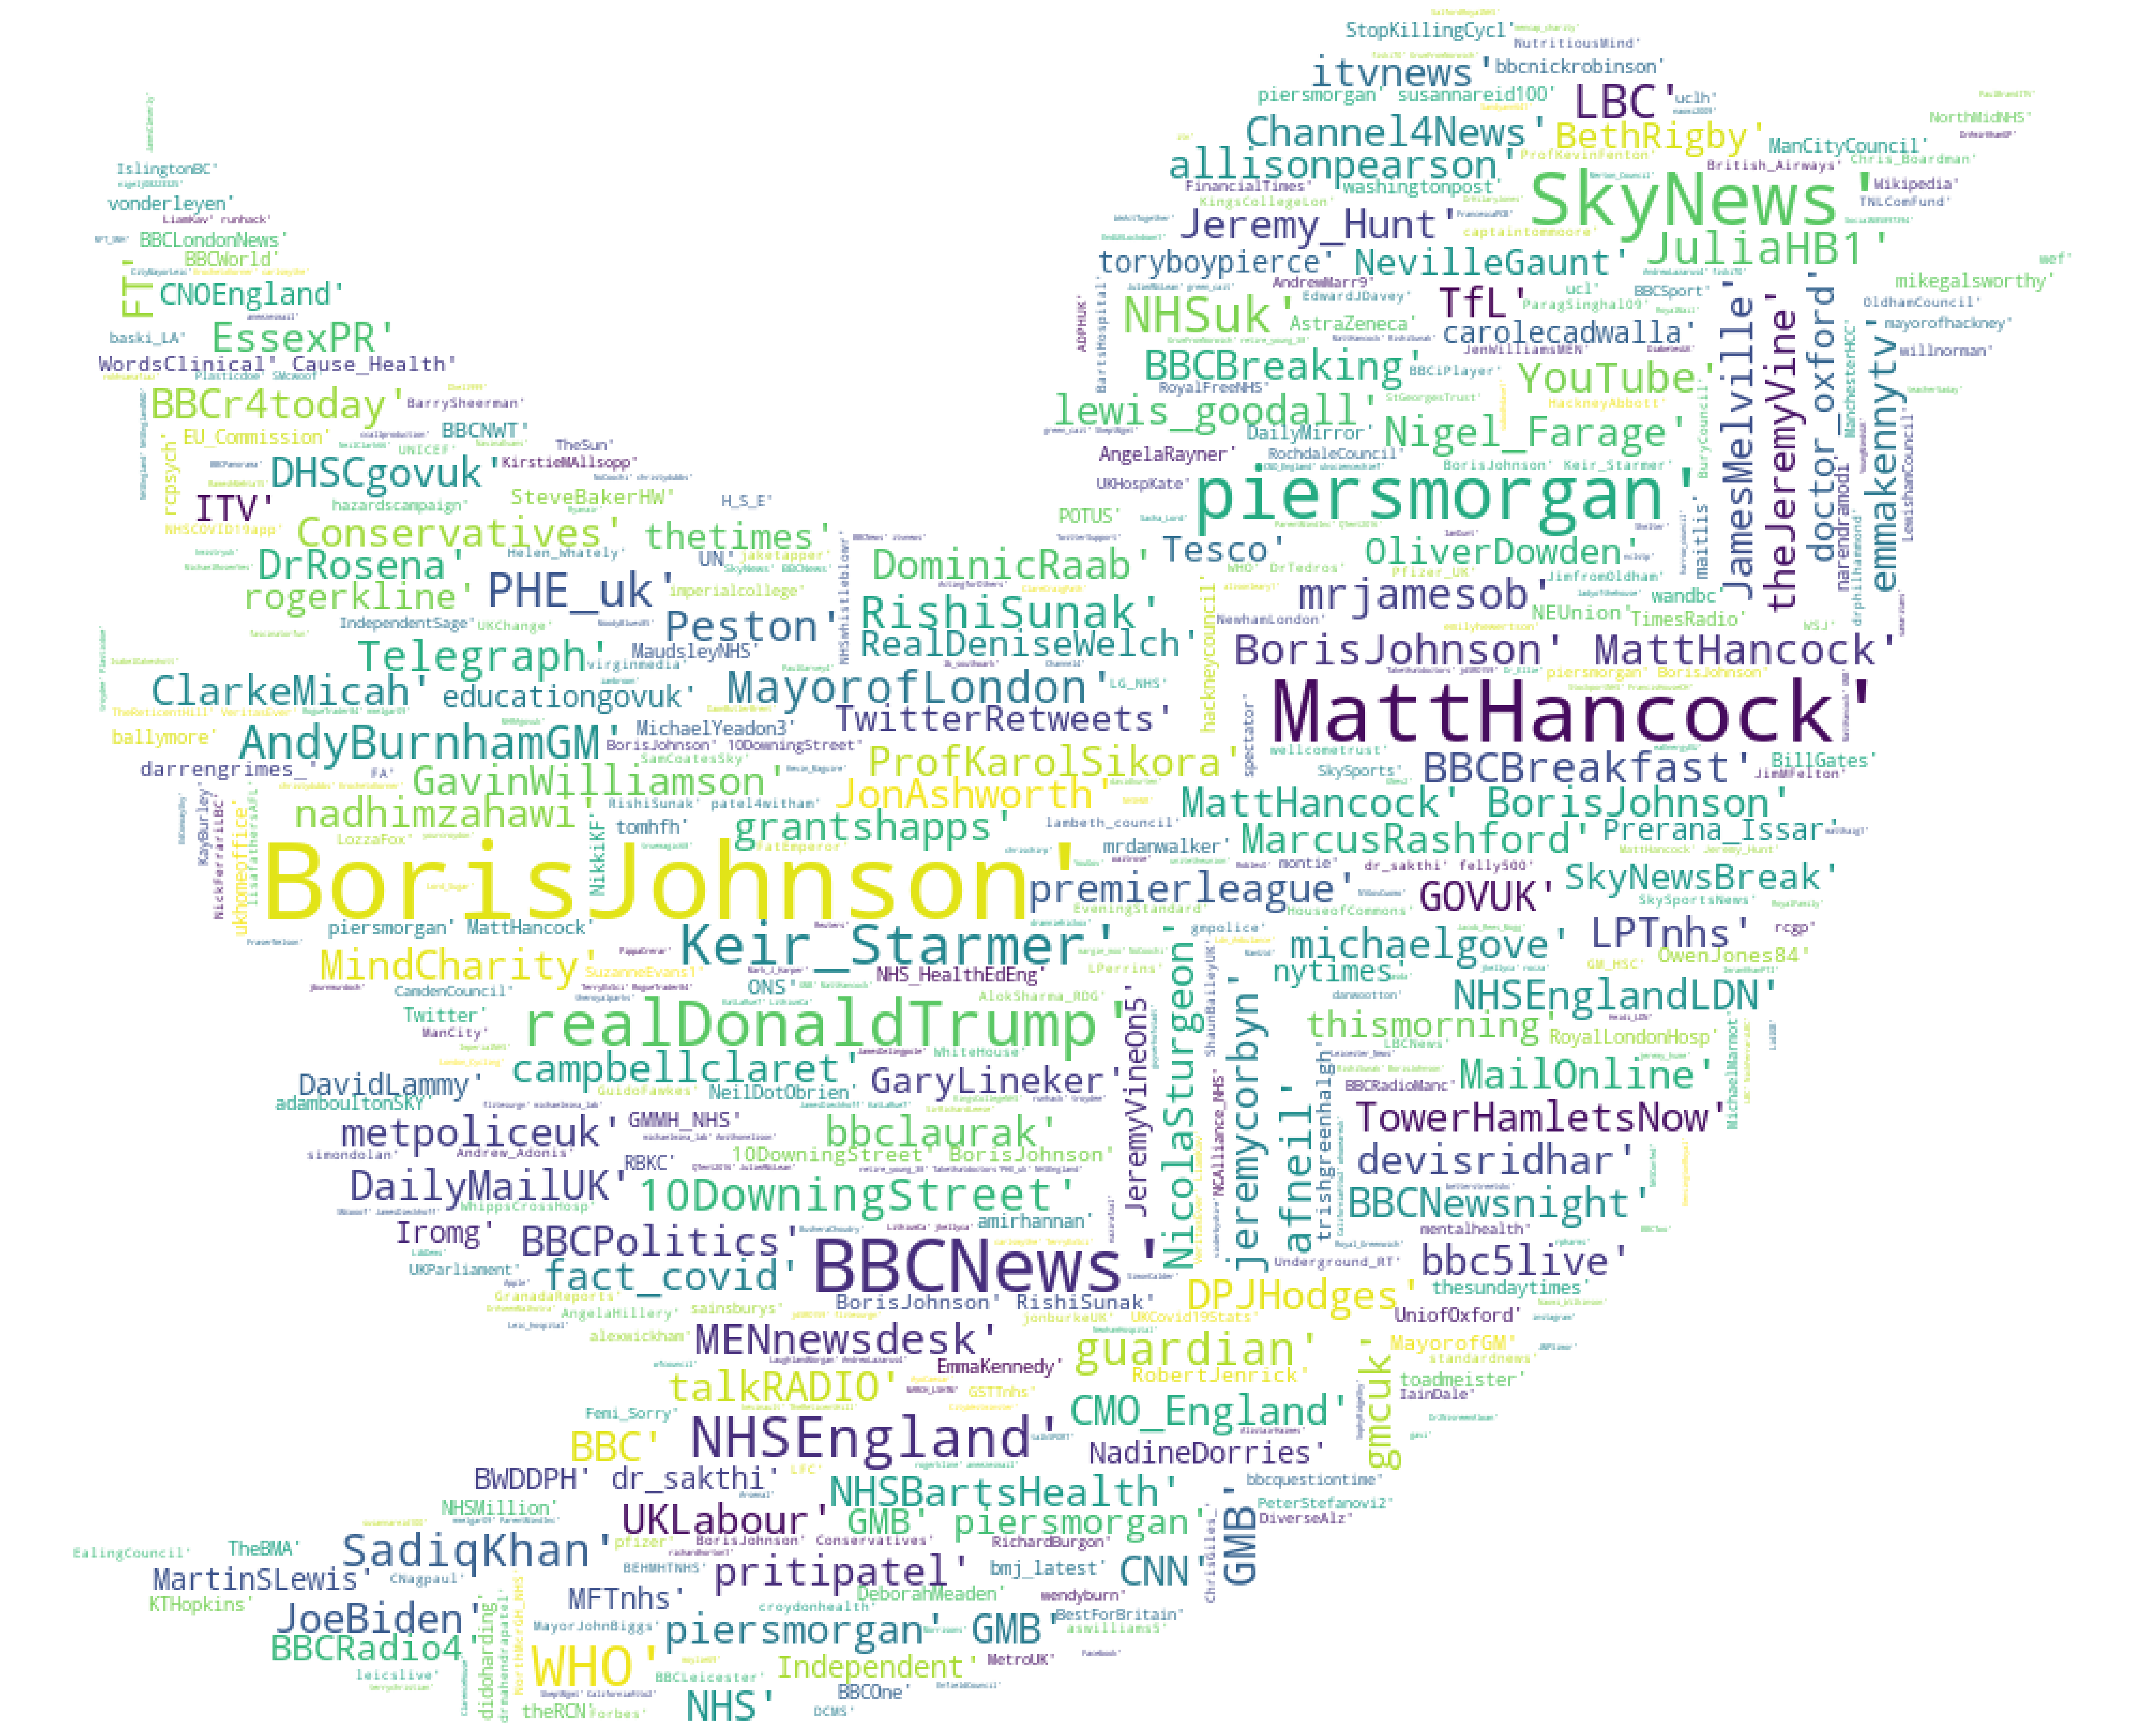

In [19]:
search_words = ('coronavirus','covid','pandemic','health','vaccine','nan')
stopwords = STOPWORDS.union(search_words)
clean_text1 = set([str(word) for word in df['mention']])
wc(clean_text1,stopwords,'white','Common Words' )

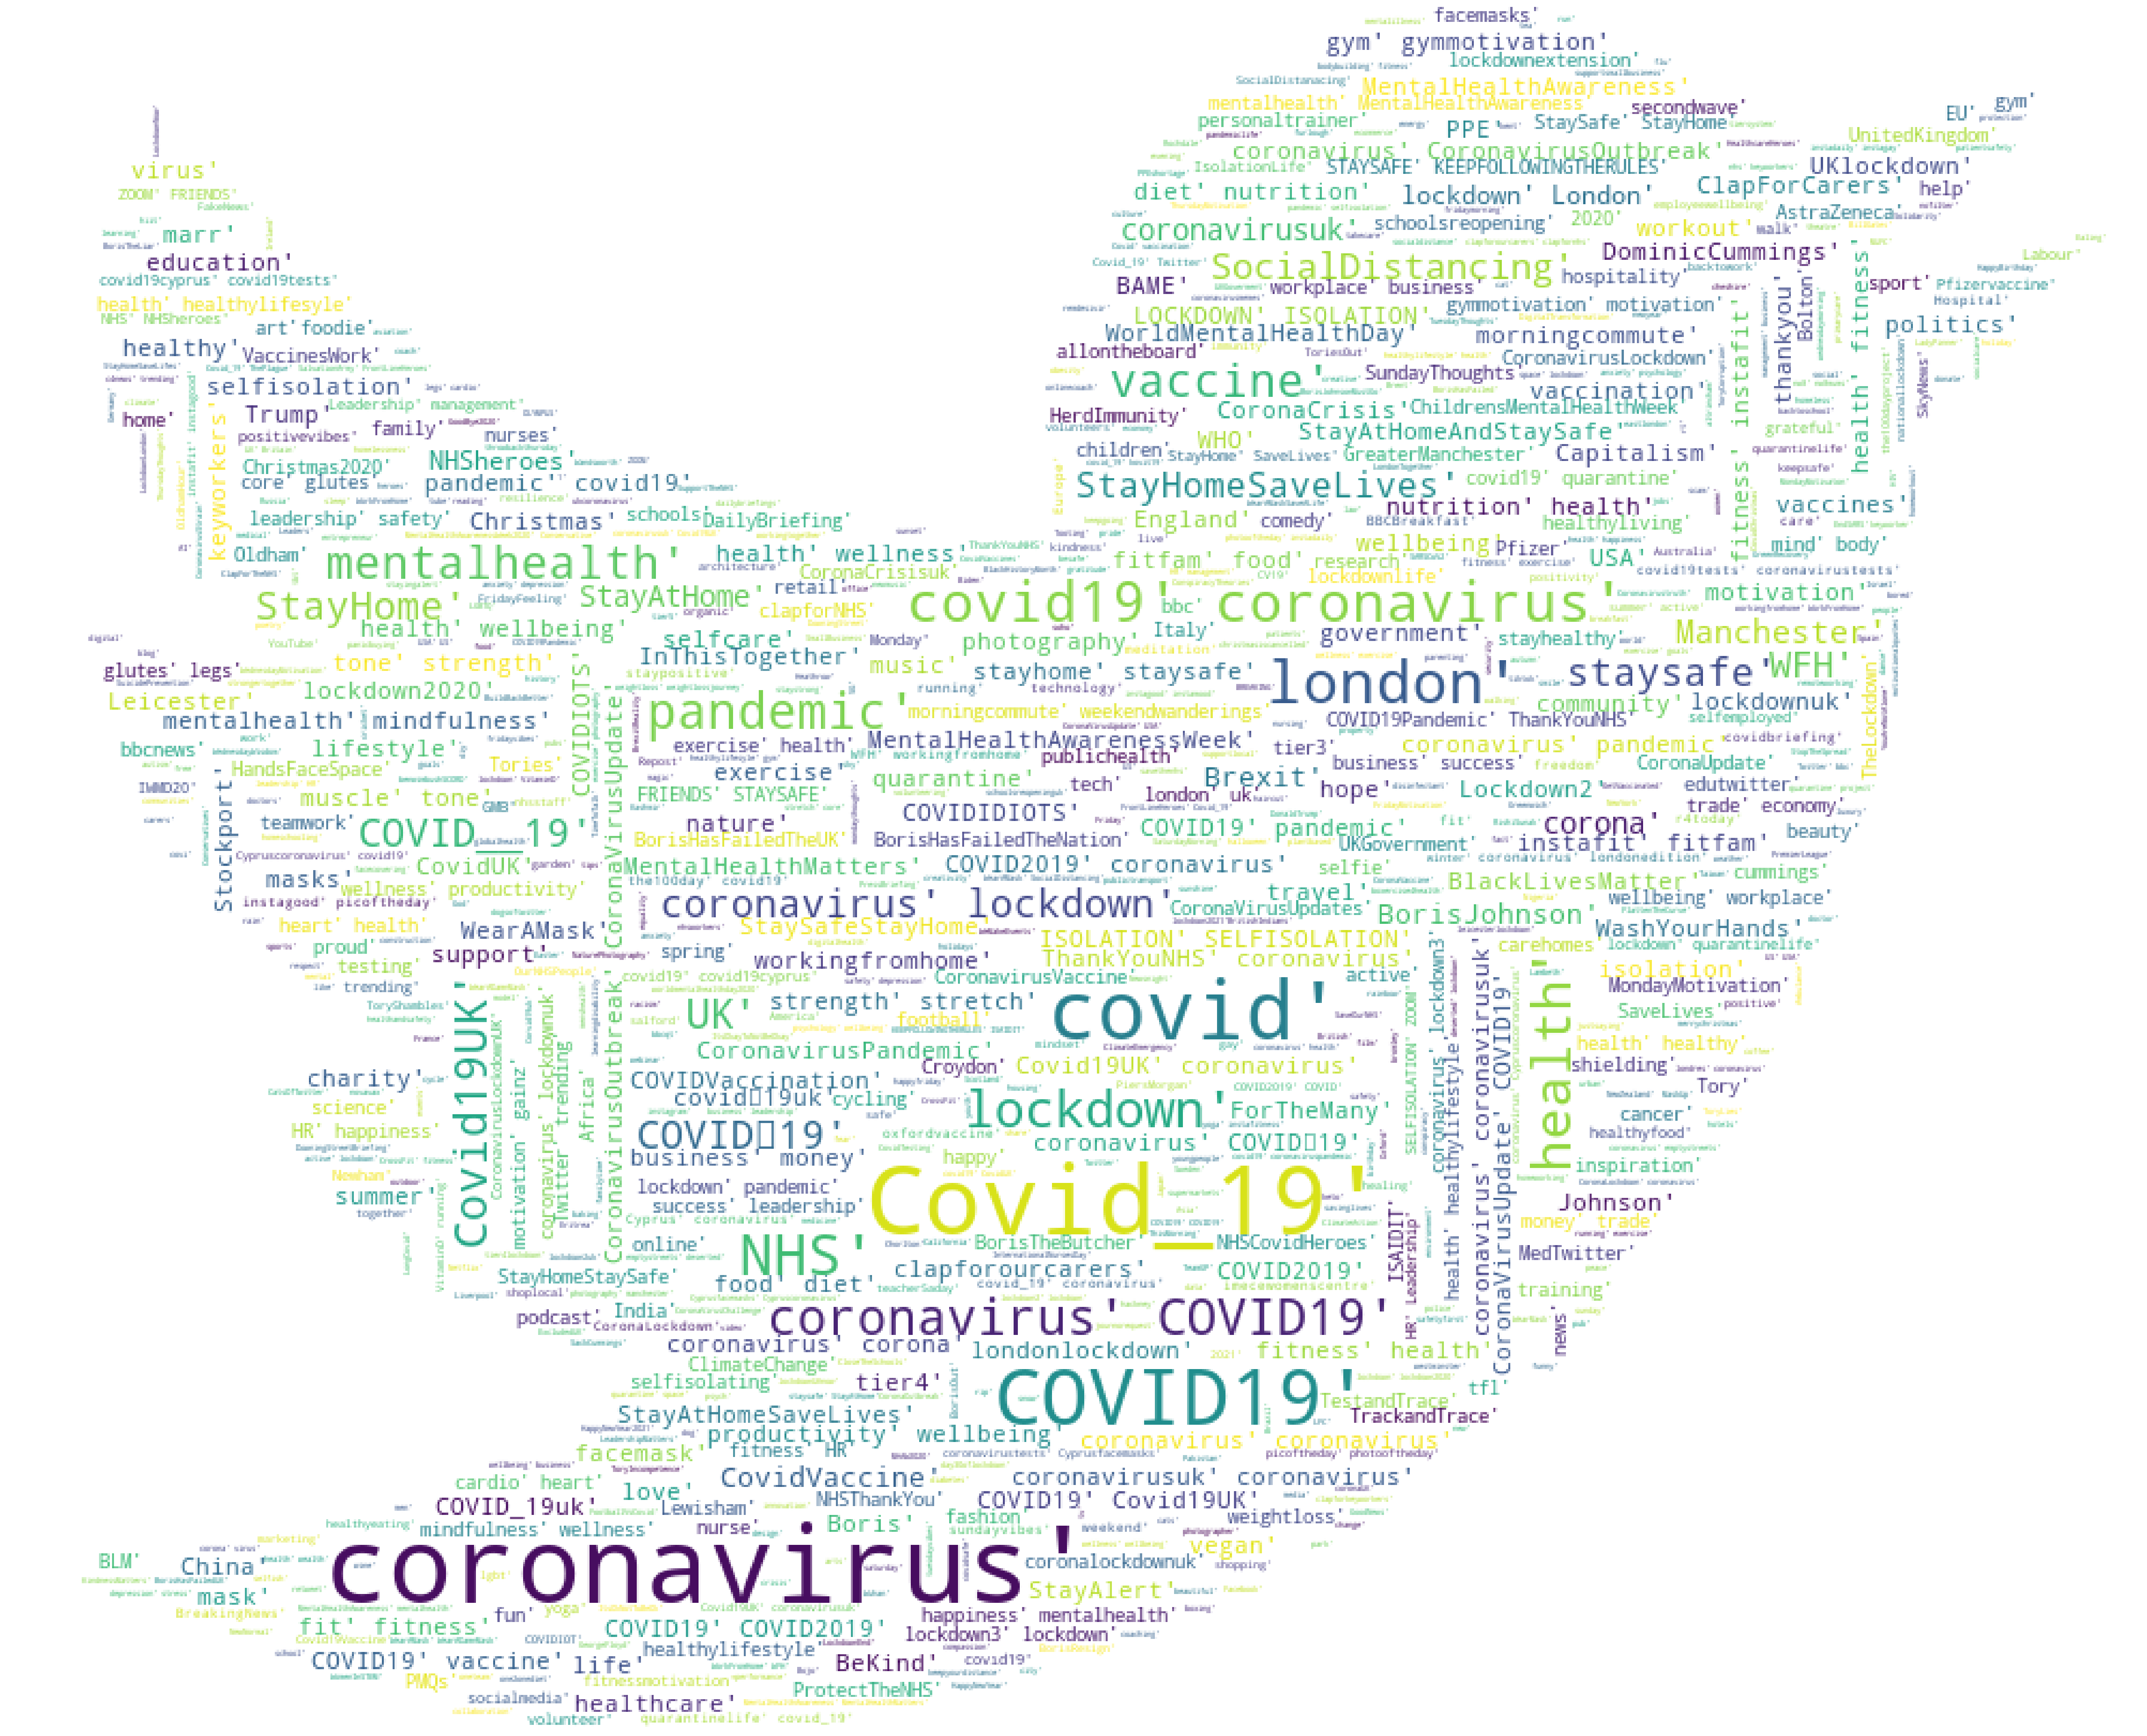

In [23]:
search_words = ('coronavirus','covid','pandemic','health','vaccine','nan','COVID19','Covid19UK')
stopwords = STOPWORDS.union(search_words)
clean_text = set([str(word) for word in df['hashtag']])
wc(clean_text,stopwords,'white','Common Words' )

## Cases from UK government 
These are the case count as published by the UK government. Data was downloaded for the period 01-03-2020 to 28-02-2021 for UK and London. 
Data can be found here: https://coronavirus.data.gov.uk/details/cases

The original dataset included cases starting from January until date of download. These observations had to be removed so that we may compare them to the tweet dataset used in this analysis.

In [38]:
london = pd.read_csv("data/London_cases.csv")
uk = pd.read_csv("data/UK_cases.csv")
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   areaType                365 non-null    object
 1   areaName                365 non-null    object
 2   areaCode                365 non-null    object
 3   date                    365 non-null    object
 4   newCasesBySpecimenDate  365 non-null    int64 
 5   cumCasesBySpecimenDate  365 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 17.2+ KB


In [39]:
london['date'] = pd.to_datetime(london.date)
london.set_index('date', inplace=True, drop=True)
london.rename(columns={'newCasesBySpecimenDate': 'London_New_Cases'}, inplace=True)
london.rename(columns={'cumCasesBySpecimenDate': 'London_Cumm_cases'}, inplace=True)
london = london[['London_New_Cases','London_Cumm_cases']]
london.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-02-28 to 2020-03-01
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   London_New_Cases   365 non-null    int64
 1   London_Cumm_cases  365 non-null    int64
dtypes: int64(2)
memory usage: 8.6 KB


In [40]:
uk['date'] = pd.to_datetime(uk.date)
uk.set_index('date', inplace=True, drop=True)
uk.rename(columns={'newCasesBySpecimenDate': 'UK_New_Cases'}, inplace=True)
uk.rename(columns={'cumCasesBySpecimenDate': 'UK_Cumm_cases'}, inplace=True)
uk = uk[['UK_New_Cases','UK_Cumm_cases']]
uk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-02-28 to 2020-03-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   UK_New_Cases   365 non-null    int64
 1   UK_Cumm_cases  365 non-null    int64
dtypes: int64(2)
memory usage: 8.6 KB


In [64]:
# Calculate change in weekly number of cases. Column "Increase" = 1 if there is increase
uk['diff'] = uk.UK_New_Cases.diff()
uk['Increase'] = uk['diff'].apply(lambda x: 1 if x < 0 else 0)

text  \
time                                                                                                                                                                                                                                                                                             
2021-02-05 09:43:20+00:00                                                                                                                                                                                                                     When the pandemic ends I want to go speed dating   
2021-02-15 08:37:19+00:00              Still find it incredulous how a man in Neil Ferguson, whose historic modelling has been proven to have had such inaccurate results, is STILL the one majorly defining government policy on Covid. Why? When his record is so woefully inaccurate. 🤷‍♂️    
2020-04-20 11:14:19+00:00                                                                                                                                                                "Boris Johnson skipped COVID-  meetings and ignored scientists' warnings, The Sunday Times reports"     
2021-01-15 18:22:22+00:00  @clarky  Oh Sally 😔 Covid is affecting so much other treatment for so many people and will continue to unless people just suck it up &amp; at least try to stop the spread of the virus. Sending you all the love in the world. Glad you've had the first dose. Hxx   
2020-03-26 13:12:57+00:00                                                                                                                After #coronavirus is over.... definitely #coronababy we escalate the population of the world... in fact d wahala wey #coronavirus go bring... 😂😂😂😂😂    

                           Sentiment  case_increase  
time                                                 
2021-02-05 09:43:20+00:00          1            0.0  
2021-02-15 08:37:19+00:00         -1            0.0  
2020-04-20 11:14:19+00:00         -1            0.0  
2021-01-15 18:22:22+00:00          1            0.0  
2020-03-26 13:12:57+00:00          1            1.0

In [93]:
df_tweets = df.copy()
df_tweets['case_increase'] = df_tweets['Date'].apply(lambda x : uk.loc[pd.to_datetime(x)]['Increase'])
df_tweets[['text','Sentiment','case_increase']].head()

text  \
time                                                                                                                                                                                                                                                                                             
2021-02-05 09:43:20+00:00                                                                                                                                                                                                                     When the pandemic ends I want to go speed dating   
2021-02-15 08:37:19+00:00              Still find it incredulous how a man in Neil Ferguson, whose historic modelling has been proven to have had such inaccurate results, is STILL the one majorly defining government policy on Covid. Why? When his record is so woefully inaccurate. 🤷‍♂️    
2020-04-20 11:14:19+00:00                                                                                                                                                                "Boris Johnson skipped COVID-  meetings and ignored scientists' warnings, The Sunday Times reports"     
2021-01-15 18:22:22+00:00  @clarky  Oh Sally 😔 Covid is affecting so much other treatment for so many people and will continue to unless people just suck it up &amp; at least try to stop the spread of the virus. Sending you all the love in the world. Glad you've had the first dose. Hxx   
2020-03-26 13:12:57+00:00                                                                                                                After #coronavirus is over.... definitely #coronababy we escalate the population of the world... in fact d wahala wey #coronavirus go bring... 😂😂😂😂😂    

                           Sentiment  case_increase  
time                                                 
2021-02-05 09:43:20+00:00          1            0.0  
2021-02-15 08:37:19+00:00         -1            0.0  
2020-04-20 11:14:19+00:00         -1            0.0  
2021-01-15 18:22:22+00:00          1            0.0  
2020-03-26 13:12:57+00:00          1            1.0

In [94]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86580 entries, 2021-02-05 09:43:20+00:00 to 2020-07-11 10:38:02+00:00
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text           86580 non-null  object 
 1   location       77656 non-null  object 
 2   hashtag        25889 non-null  object 
 3   mention        43702 non-null  object 
 4   Date           86580 non-null  object 
 5   Day            86580 non-null  int64  
 6   Month          86580 non-null  int64  
 7   Hour           86580 non-null  int64  
 8   Negative       86580 non-null  float64
 9   Neutral        86580 non-null  float64
 10  Positive       86580 non-null  float64
 11  Polarity       86580 non-null  float64
 12  abs_pol        86580 non-null  float64
 13  Sentiment      86580 non-null  int64  
 14  Length         86580 non-null  int64  
 15  tweet_token    86580 non-null  object 
 16  lemma          86580 non-null  object 
 17  big

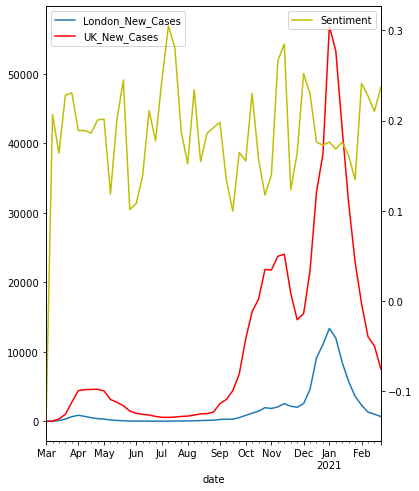

In [65]:
fig, ax = plt.subplots(figsize=(6,8))
london.resample('W').mean()[['London_New_Cases']].plot(label = 'London', ax=ax)
uk.resample('W').mean()[['UK_New_Cases']].plot(label = 'UK',color='r',ax=ax)
ax1 = ax.twinx()
weekly[['Sentiment']].plot(color='y',ax=ax1);
plt.show()

## EDA Conclusion
Tweets were collected for a period of 12 month over a geography that spanned England. Tweets were searched for 5 keywords related to coronavirus - coronavirus, covid, pandemic, vaccine and health. The last two - vaccine and health - were included to with the objective of getting a balanced sentiment dataset. The assumption is that tweets that were hopeful or optimistic would include these words. 

### Limitations
Sentiment analysis is only as good as the datasets used. One limiation is that the labelled sentiment dictionary was not built for the context of coronavirus or the Twitter universe. This may affect how it labels a tweet.

The initial idea was to include more keywords so that we could get a more balanced dataset. However, the current dataset is very large already. It was getting cumbersome to work with a large dataset. 
The initial idea of covering all of UK - Wales, Scotland and Northern Ireland - could not be exectued for the same reason.

I initially used the nlp sentiment dictionary to do the Sentiment Analysis. This didn't produce very good sentiment analysis. I then used Vader Sentiment Analyzer which performed better. The Vader analyzer is generally known to work better for the twitter corpus.

To get the tokens, I used the Tweet Tokenizer which is designed to tokenize tweets and performed better than the nlp tokenizer I had used initially.

### Risk
Searching by the keywords I chose may have resulted in tweets with a higher tendency to be negative. If I had more time and space, I would have liked to expand the keywords. Another option is to not search by keywords. These may result in a tweet dataset that is more reflective of the sentiments of the English tweeting population.
However, this project was aimed specificually at analyzing covid sentiments.

### If I had more time
I would expand the search parameter to include all words. I would include more granular information on location. I would look at location specific sentiments and match these against increase in cases in that region.


After doing the revised EDA, I found that coronavirus related tweets in England fluctutated over twelve months. They showed a positive peak in July and November. There could a number of social factors that account for this - the month before the holidays, lifting of lockdown, and the news.

Analyzing tweets over time, we see that sentiments were much more positive in March 2020. It then dipped mid-March. Since then, it has been fluctuating but staying positive. We also see a positive upswing in August, which coincides with the summer break.
A comparison of tweet sentiment and actual cases as reported by the UK government, doesn't seem to show any correlation. Further analysis by shifting time may reveal more insights.

There seems to be almost no correlation between the sentiment of a tweet and the time of posting, nor the day of the week it was posted in. The objectivity of a tweet is negatively correlated with the (absolute) polarity of the tweet.This indicates that the higher the polarity measure is, the less objective the tweet is. This is consistent with what these features indicate. While the figure shows a high correlation between polarity and sentiment, this can be ignored, as the sentiment is derived from polarity.

Eyeballing the Word Cloud, excluding search parameters, we can see more positive words than negative. Keep smiling, England! :)

Next steps:

    1. Extract or remove more characters and text such as emojis, single-character words, foreign language words and names using Named Entity Recognition. Determine if the emojis and names may be used for further analysis or modeling.
    2. Do a tf-idf.
    3. Prepare the data for modeling. I will use classifiers and Bagging and Ensemble methods.
 

## Vectorization
CountVectorizer gives a vector with the number of times each word appears in the document. This leads to a few problems mainly that common words like “a”,”the”,”and”,”an” etc will appear often and other words that are more relevant will be less frequent. This will skew your model.

TF-IDF balances out the term frequency (how often the word appears in the tweets) with its inverse document frequency (how often the term appears across all documents in the data set). Rarer words like for instance “machine learning” will be very common in just a handful of documents which talk about computer science or AI. TF-IDF will give higher scores to these words and thus they’ll be the ones that the model identifies as important and tries to learn.

In [95]:
# Creating a pickle of tweets dataframe
df_tweets.to_pickle('df_tweets.pkl')

### Tf-Idf Vectorizer

In [3]:
df_tweets = pd.read_pickle("df_tweets.pkl")

In [4]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86580 entries, 2021-02-05 09:43:20+00:00 to 2020-07-11 10:38:02+00:00
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text           86580 non-null  object 
 1   location       77656 non-null  object 
 2   hashtag        25889 non-null  object 
 3   mention        43702 non-null  object 
 4   Date           86580 non-null  object 
 5   Day            86580 non-null  int64  
 6   Month          86580 non-null  int64  
 7   Hour           86580 non-null  int64  
 8   Negative       86580 non-null  float64
 9   Neutral        86580 non-null  float64
 10  Positive       86580 non-null  float64
 11  Polarity       86580 non-null  float64
 12  abs_pol        86580 non-null  float64
 13  Sentiment      86580 non-null  int64  
 14  Length         86580 non-null  int64  
 15  tweet_token    86580 non-null  object 
 16  lemma          86580 non-null  object 
 17  big

In [98]:
df.Region.nunique()

4619

In [5]:
# Vectorizing lemmatized words from tweets
text = df_tweets['lemma']

tvec = TfidfVectorizer(stop_words='english',
                        lowercase=True,
                        max_df=0.98,
                        min_df = 0.0005,
                        max_features=10000,
                        ngram_range=(1, 3),
                        norm='l2'
                        )
tvec.fit(text)
trans_text = tvec.transform(text)

# create a dataframe with vectorized words, bigrams and trigrams
words_ngrams = pd.DataFrame(trans_text.toarray(),columns=tvec.get_feature_names())
#words_ngrams.transpose().sort_values(0, ascending=False)
words_ngrams

abandon  ability  able  abroad  absence  absolute  absolutely  abuse  \
0          0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0   
1          0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0   
2          0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0   
3          0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0   
4          0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0   
...        ...      ...   ...     ...      ...       ...         ...    ...   
86575      0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0   
86576      0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0   
86577      0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0   
86578      0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0   
86579      0.0      0.0   0.0     0.0      0.0       0.0         0.0    0.0   

       academic  academy  ...   yr  yr old  yr old liam  zealand  zero  \
0           0.0      0.0  ...  0.0     0.0          0.0      0.0   0.0   
1           0.0      0.0  ...  0.0     0.0          0.0      0.0   0.0   
2           0.0      0.0  ...  0.0     0.0          0.0      0.0   0.0   
3           0.0      0.0  ...  0.0     0.0          0.0      0.0   0.0   
4           0.0      0.0  ...  0.0     0.0          0.0      0.0   0.0   
...         ...      ...  ...  ...     ...          ...      ...   ...   
86575       0.0      0.0  ...  0.0     0.0          0.0      0.0   0.0   
86576       0.0      0.0  ...  0.0     0.0          0.0      0.0   0.0   
86577       0.0      0.0  ...  0.0     0.0          0.0      0.0   0.0   
86578       0.0      0.0  ...  0.0     0.0          0.0      0.0   0.0   
86579       0.0      0.0  ...  0.0     0.0          0.0      0.0   0.0   

       zero covid  zone  zoom  zoom friend  zoom friend staysafe  
0             0.0   0.0   0.0          0.0                   0.0  
1             0.0   0.0   0.0          0.0                   0.0  
2             0.0   0.0   0.0          0.0                   0.0  
3             0.0   0.0   0.0          0.0                   0.0  
4             0.0   0.0   0.0          0.0                   0.0  
...           ...   ...   ...          ...                   ...  
86575         0.0   0.0   0.0          0.0                   0.0  
86576         0.0   0.0   0.0          0.0                   0.0  
86577         0.0   0.0   0.0          0.0                   0.0  
86578         0.0   0.0   0.0          0.0                   0.0  
86579         0.0   0.0   0.0          0.0                   0.0  

[86580 rows x 4524 columns]

In [69]:
words_ngrams.value_counts()

abandon  ability  able  abroad  absence  absolute  absolutely  abuse  academic  academy  accelerate  accept  acceptable  accepted  access  accessible  accident  accommodation  accord  account  accurate  accuse  achieve  achievement  acknowledge  act  action  active  actively  activist  activity  actor  actual  actually  acute  ad   adam  adapt  aday  add  addiction  additional  address  adequate  adhere  administer  administration  admission  admit  admits  adopt  adult  advance  advantage  adverse  advert  advertising  advice  advise  adviser  advisor  advocate  affect  affect mental  affect mental health  affected  affected covid  afford  affordable  afneil  afraid  africa  african  afternoon  age  agency  agenda  agent  ago  agree  ah   ahead  ai   aid  aim  air  air pollution  airline  airport  airway  aka  al   alarm  album  alcohol  alert  alex  alive  allah  allisonpearson  allow  allows  alongside  alternative  amaze  amaze work  amazon  ambassador  ambulance  america  american

In [70]:
tvec.get_feature_names()

['abandon',
 'ability',
 'able',
 'abroad',
 'absence',
 'absolute',
 'absolutely',
 'abuse',
 'academic',
 'academy',
 'accelerate',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessible',
 'accident',
 'accommodation',
 'accord',
 'account',
 'accurate',
 'accuse',
 'achieve',
 'achievement',
 'acknowledge',
 'act',
 'action',
 'active',
 'actively',
 'activist',
 'activity',
 'actor',
 'actual',
 'actually',
 'acute',
 'ad',
 'adam',
 'adapt',
 'aday',
 'add',
 'addiction',
 'additional',
 'address',
 'adequate',
 'adhere',
 'administer',
 'administration',
 'admission',
 'admit',
 'admits',
 'adopt',
 'adult',
 'advance',
 'advantage',
 'adverse',
 'advert',
 'advertising',
 'advice',
 'advise',
 'adviser',
 'advisor',
 'advocate',
 'affect',
 'affect mental',
 'affect mental health',
 'affected',
 'affected covid',
 'afford',
 'affordable',
 'afneil',
 'afraid',
 'africa',
 'african',
 'afternoon',
 'age',
 'agency',
 'agenda',
 'agent',
 'ago',
 'agree',
 'ah',
 'ahead',

### Merge word vector with original dataframe

In [6]:
df1 = df_tweets[['Region','Day','Month','Hour','Polarity','abs_pol','Sentiment','case_increase']].reset_index()
tweets = pd.concat([df1,words_ngrams],axis=1)

In [7]:
tweets.head(3)

time  Region  Day  Month  Hour  Polarity  abs_pol  \
0 2021-02-05 09:43:20+00:00  London    4      2     9    0.0772   0.0772   
1 2021-02-15 08:37:19+00:00  London    0      2     8   -0.5410   0.5410   
2 2020-04-20 11:14:19+00:00  London    0      4    11   -0.5423   0.5423   

   Sentiment  case_increase  abandon  ...   yr  yr old  yr old liam  zealand  \
0          1            0.0      0.0  ...  0.0     0.0          0.0      0.0   
1         -1            0.0      0.0  ...  0.0     0.0          0.0      0.0   
2         -1            0.0      0.0  ...  0.0     0.0          0.0      0.0   

   zero  zero covid  zone  zoom  zoom friend  zoom friend staysafe  
0   0.0         0.0   0.0   0.0          0.0                   0.0  
1   0.0         0.0   0.0   0.0          0.0                   0.0  
2   0.0         0.0   0.0   0.0          0.0                   0.0  

[3 rows x 4533 columns]

In [101]:
# Save dataframe to a csv file for next stage
tweets.to_csv("cleaned_tweets")

In [3]:
tweets = pd.read_csv("cleaned_tweets")

### One-Hot Encoding

In [4]:
tweets_dum = pd.get_dummies(tweets, 
                columns=['Month','Day','Hour','Sentiment','Region'])
tweets_dum.head()

Unnamed: 0                       time  Polarity  abs_pol  case_increase  \
0           0  2021-02-05 09:43:20+00:00    0.0772   0.0772            0.0   
1           1  2021-02-15 08:37:19+00:00   -0.5410   0.5410            0.0   
2           2  2020-04-20 11:14:19+00:00   -0.5423   0.5423            0.0   
3           3  2021-01-15 18:22:22+00:00    0.5267   0.5267            0.0   
4           4  2020-03-26 13:12:57+00:00    0.9451   0.9451            1.0   

   abandon  ability  able  abroad  absence  ...  Region_新加坡  伦敦  Region_日本  \
0      0.0      0.0   0.0     0.0      0.0  ...               0          0   
1      0.0      0.0   0.0     0.0      0.0  ...               0          0   
2      0.0      0.0   0.0     0.0      0.0  ...               0          0   
3      0.0      0.0   0.0     0.0      0.0  ...               0          0   
4      0.0      0.0   0.0     0.0      0.0  ...               0          0   

   Region_日本 東京  Region_𓂀  Region_𝑩𝒓𝒊𝒙𝒕𝒐𝒏  𝑳𝒐𝒏𝒅𝒐𝒏  Region_𝕮𝖍𝖎𝖓𝖆𝕿𝖔𝖜𝖓 𝕷𝖔𝖓𝖉𝖔n  \
0             0         0                       0                        0   
1             0         0                       0                        0   
2             0         0                       0                        0   
3             0         0                       0                        0   
4             0         0                       0                        0   

   Region_𝗟𝗼𝗻𝗱𝗼𝗻   𝗘𝘀𝘀𝗲𝘅  Region_𝗡𝗢𝗧 in Wales right now  \
0                      0                              0   
1                      0                              0   
2                      0                              0   
3                      0                              0   
4                      0                              0   

   Region_𝙼𝚊𝚗𝚌𝚑𝚎𝚜𝚝𝚎𝚛  𝚄𝙺    Region_𝚖𝚊𝚗𝚌𝚑𝚎𝚜𝚝𝚎𝚛  
0                        0                  0  
1                        0                  0  
2                        0                  0  
3                        0                  0  
4                        0                  0  

[5 rows x 9193 columns]

In [5]:
y = tweets_dum['case_increase']
X = tweets_dum.copy()
X.drop(columns=['case_increase','time'], inplace=True,axis=1)

In [6]:
X.shape

(86580, 9191)

In [7]:
X.describe()

Unnamed: 0      Polarity       abs_pol       abandon       ability  \
count  86580.00000  86580.000000  86580.000000  86580.000000  86580.000000   
mean   43289.50000      0.132579      0.469133      0.000316      0.000430   
std    24993.63749      0.545828      0.308898      0.010864      0.011748   
min        0.00000     -0.994800      0.000000      0.000000      0.000000   
25%    21644.75000     -0.296000      0.202300      0.000000      0.000000   
50%    43289.50000      0.095100      0.487700      0.000000      0.000000   
75%    64934.25000      0.623900      0.742400      0.000000      0.000000   
max    86579.00000      0.999700      0.999700      0.644440      0.572273   

               able        abroad       absence      absolute    absolutely  \
count  86580.000000  86580.000000  86580.000000  86580.000000  86580.000000   
mean       0.002275      0.000474      0.000247      0.000952      0.001993   
std        0.024270      0.013253      0.010075      0.017775      0.023662   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        0.740160      0.726474      0.661692      0.925090      0.734308   

       ...  Region_新加坡  伦敦     Region_日本  Region_日本 東京      Region_𓂀  \
count  ...    86580.000000  86580.000000  86580.000000  86580.000000   
mean   ...        0.000012      0.000012      0.000012      0.000012   
std    ...        0.003399      0.003399      0.003399      0.003399   
min    ...        0.000000      0.000000      0.000000      0.000000   
25%    ...        0.000000      0.000000      0.000000      0.000000   
50%    ...        0.000000      0.000000      0.000000      0.000000   
75%    ...        0.000000      0.000000      0.000000      0.000000   
max    ...        1.000000      1.000000      1.000000      1.000000   

       Region_𝑩𝒓𝒊𝒙𝒕𝒐𝒏  𝑳𝒐𝒏𝒅𝒐𝒏  Region_𝕮𝖍𝖎𝖓𝖆𝕿𝖔𝖜𝖓 𝕷𝖔𝖓𝖉𝖔n  Region_𝗟𝗼𝗻𝗱𝗼𝗻   𝗘𝘀𝘀𝗲𝘅  \
count            86580.000000             86580.000000           86580.000000   
mean                 0.000046                 0.000046               0.000012   
std                  0.006797                 0.006797               0.003399   
min                  0.000000                 0.000000               0.000000   
25%                  0.000000                 0.000000               0.000000   
50%                  0.000000                 0.000000               0.000000   
75%                  0.000000                 0.000000               0.000000   
max                  1.000000                 1.000000               1.000000   

       Region_𝗡𝗢𝗧 in Wales right now  Region_𝙼𝚊𝚗𝚌𝚑𝚎𝚜𝚝𝚎𝚛  𝚄𝙺    \
count                   86580.000000             86580.000000   
mean                        0.000035                 0.000012   
std                         0.005886                 0.003399   
min                         0.000000                 0.000000   
25%                         0.000000                 0.000000   
50%                         0.000000                 0.000000   
75%                         0.000000                 0.000000   
max                         1.000000                 1.000000   

       Region_𝚖𝚊𝚗𝚌𝚑𝚎𝚜𝚝𝚎𝚛  
count       86580.000000  
mean            0.000012  
std             0.003399  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 9191 columns]

In [8]:
tweets_dum.describe()

Unnamed: 0      Polarity       abs_pol  case_increase       abandon  \
count  86580.00000  86580.000000  86580.000000   86580.000000  86580.000000   
mean   43289.50000      0.132579      0.469133       0.401582      0.000316   
std    24993.63749      0.545828      0.308898       0.490221      0.010864   
min        0.00000     -0.994800      0.000000       0.000000      0.000000   
25%    21644.75000     -0.296000      0.202300       0.000000      0.000000   
50%    43289.50000      0.095100      0.487700       0.000000      0.000000   
75%    64934.25000      0.623900      0.742400       1.000000      0.000000   
max    86579.00000      0.999700      0.999700       1.000000      0.644440   

            ability          able        abroad       absence      absolute  \
count  86580.000000  86580.000000  86580.000000  86580.000000  86580.000000   
mean       0.000430      0.002275      0.000474      0.000247      0.000952   
std        0.011748      0.024270      0.013253      0.010075      0.017775   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        0.572273      0.740160      0.726474      0.661692      0.925090   

       ...  Region_新加坡  伦敦     Region_日本  Region_日本 東京      Region_𓂀  \
count  ...    86580.000000  86580.000000  86580.000000  86580.000000   
mean   ...        0.000012      0.000012      0.000012      0.000012   
std    ...        0.003399      0.003399      0.003399      0.003399   
min    ...        0.000000      0.000000      0.000000      0.000000   
25%    ...        0.000000      0.000000      0.000000      0.000000   
50%    ...        0.000000      0.000000      0.000000      0.000000   
75%    ...        0.000000      0.000000      0.000000      0.000000   
max    ...        1.000000      1.000000      1.000000      1.000000   

       Region_𝑩𝒓𝒊𝒙𝒕𝒐𝒏  𝑳𝒐𝒏𝒅𝒐𝒏  Region_𝕮𝖍𝖎𝖓𝖆𝕿𝖔𝖜𝖓 𝕷𝖔𝖓𝖉𝖔n  Region_𝗟𝗼𝗻𝗱𝗼𝗻   𝗘𝘀𝘀𝗲𝘅  \
count            86580.000000             86580.000000           86580.000000   
mean                 0.000046                 0.000046               0.000012   
std                  0.006797                 0.006797               0.003399   
min                  0.000000                 0.000000               0.000000   
25%                  0.000000                 0.000000               0.000000   
50%                  0.000000                 0.000000               0.000000   
75%                  0.000000                 0.000000               0.000000   
max                  1.000000                 1.000000               1.000000   

       Region_𝗡𝗢𝗧 in Wales right now  Region_𝙼𝚊𝚗𝚌𝚑𝚎𝚜𝚝𝚎𝚛  𝚄𝙺    \
count                   86580.000000             86580.000000   
mean                        0.000035                 0.000012   
std                         0.005886                 0.003399   
min                         0.000000                 0.000000   
25%                         0.000000                 0.000000   
50%                         0.000000                 0.000000   
75%                         0.000000                 0.000000   
max                         1.000000                 1.000000   

       Region_𝚖𝚊𝚗𝚌𝚑𝚎𝚜𝚝𝚎𝚛  
count       86580.000000  
mean            0.000012  
std             0.003399  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 9192 columns]

### Train-Test Split and Standardization

In [9]:
# create a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
# Standardize dataset using Standard Scaler
scaler = StandardScaler()
X_train_ss = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns) 
X_test_ss = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns) 

In [ ]:
# Pickiling the dataset so that we don't need to preprocess again.
X_train.to_pickle('X_train.pkl')
X_test.to_pickle('X_test.pkl')
y_train.to_pickle('y_train.pkl')
y_test.to_pickle('y_test.pkl')

In [ ]:
# Standardize dataset using MinMax Scaler
mmscaler = MinMaxScaler()
X_train_mm = pd.DataFrame(mmscaler.fit_transform(X_train), columns=X_train.columns) 
X_test_mm = pd.DataFrame(mmscaler.transform(X_test), columns=X_train.columns) 

In [ ]:
X_train_mm.to_pickle('X_train_mms.pkl')
X_test_mm.to_pickle('X_test_mms.pkl')
y_train_mm.to_pickle('y_train_mms.pkl')
y_test_mm.to_pickle('y_test_mms.pkl')